# Proyecto Integrador M4: Expansión Estratégica de Biogenesys con Python

## Avance 1 Carga y Transformación de Datos

In [ ]:
import pandas as pd
import numpy as np

Lectura de datos

In [ ]:
data_regiones = pd.read_csv(r'C:\Users\Efrain Chapal\Documents\Henry\Assets\data_latinoamerica.csv')

In [ ]:
data_regiones.info()

In [ ]:
print(data_regiones.shape)

In [ ]:
data_regiones['date'] = pd.to_datetime(data_regiones['date'], errors = 'coerce')
fecha_inicio = '2021-01-01'
fecha_fin = '2022-09-09'

mascara_fecha = (data_regiones['date'] >= fecha_inicio) & (data_regiones['date'] <= fecha_fin)
data_regiones = data_regiones[mascara_fecha]

In [ ]:
print(data_regiones.shape)

Se exportan los datos

In [ ]:
data_regiones.to_csv('data_regiones.csv', index=False)

Se seleccionan los datos de los 6 paises objetivo

In [ ]:
paises_objetivo = ['AR', 'BR', 'CL', 'CO', 'MX', 'PE']

mascara_filtro = data_regiones['location_key'].isin(paises_objetivo)

data_regiones = data_regiones[mascara_filtro]

Exportar datos por país

In [ ]:
print("\nDefiniendo (o re-confirmando) función para exportar .describe() por cada país...")

# --- Definir la función para exportar .describe() por cada país ---
# (Este es el mismo código de función que te di antes para este propósito)

def exportar_describe_por_pais(df, country_name_column='country_name'):
    """
    Calcula y exporta estadísticas descriptivas (.describe()) para cada país
    en un DataFrame, generando un archivo CSV por país.

    Args:
        df (pd.DataFrame): El DataFrame de entrada (debe contener la columna country_name).
        country_name_column (str): El nombre de la columna que contiene los nombres de los países.
                                   Por defecto es 'country_name'.
    """
    if country_name_column not in df.columns:
        print(f"ERROR: La columna '{country_name_column}' no se encontró en el DataFrame.")
        return

    # Obtener la lista única de países en el DataFrame
    # Usaremos los nombres de países que existan en data_regiones
    lista_paises_en_df = df[country_name_column].unique()

    print(f"Iniciando exportación de estadísticas descriptivas para {len(lista_paises_en_df)} países encontrados en el DataFrame...")

    # Iterar sobre cada país encontrado en el DataFrame
    for country in lista_paises_en_df:
        # Los nombres de los países en tu dataset son 'Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru'
        # La función procesará cada uno de estos.

        print(f"\nProcesando estadísticas descriptivas para: {country}...")

        # Filtrar el DataFrame para el país actual
        df_pais = df[df[country_name_column] == country].copy()

        if df_pais.empty:
            print(f"  Advertencia: No hay datos para el país '{country}'. Saltando.")
            continue # Pasar al siguiente país si no hay datos

        # Calcular las estadísticas descriptivas para el DataFrame filtrado por país
        describe_pais_df = df_pais.describe()

        # Definir el nombre del archivo de salida (incluye el nombre del país)
        # Reemplazamos espacios por guiones bajos por si los nombres de país los tuvieran
        # La extensión es .csv
        nombre_archivo = f'describe_stats_{country.replace(" ", "_")}.csv'

        # Exportar el DataFrame de estadísticas a un archivo CSV
        # El índice (mean, std, etc.) es importante y se exportará por defecto.
        try:
            describe_pais_df.to_csv(nombre_archivo)
            print(f"  Archivo '{nombre_archivo}' guardado exitosamente.")
        except Exception as e:
            print(f"  ERROR al exportar archivo '{nombre_archivo}': {e}")

    print("\nProceso de exportación de estadísticas descriptivas por país completado.")
    print(f"Deberías encontrar {len(lista_paises_en_df)} archivos CSV generados.")


# --- Llamar a la función para ejecutar la exportación ---

# Llama a la función pasando tu DataFrame actual, que es data_regiones
exportar_describe_por_pais(data_regiones, 'country_name') 

IMPORTACIÓN DEL DATASET FILTRADO POR PAIS

In [ ]:
import numpy as np
import pandas as pd

datos_regiones = pd.read_csv(r"C:\Users\Efrain Chapal\Documents\Henry\Proyectos\data_regiones2.csv", sep=',', parse_dates=['date'])

In [ ]:
datos_regiones.info()

Se define función para calcular las estadísticas de cada región por país y se exporta

In [ ]:
# Continuamos trabajando con df_fechado_pais (que ahora incluye la columna 'subregion')

# --- Tarea 2: Función para calcular estadísticas por subregión para un país ---

def calcular_stats_por_region_pais(df, nombre_pais):
    """
    Filtra un DataFrame por país, calcula estadísticas descriptivas para columnas
    numéricas por subregión, y devuelve el DataFrame de estadísticas.

    Args:
        df (pd.DataFrame): El DataFrame de entrada (debe contener 'country_name',
                           'subregion', y columnas numéricas).
        nombre_pais (str): El nombre exacto del país por el que filtrar.

    Returns:
        pd.DataFrame: Un DataFrame con estadísticas descriptivas (de .describe())
                      por subregión para el país especificado, o None si el país
                      no se encuentra o no tiene datos con subregión.
    """
        # Paso 1: Filtrar el DataFrame por el país especificado
    df_pais = df[df['country_name'] == nombre_pais].copy()

    # Paso 2: Asegurarse de que haya subregiones (no NaN) para agrupar
    # Eliminamos las filas donde la subregion es NaN, ya que representan el país completo o formato inesperado.
    # Las estadísticas "por subregion" no aplican a la fila de país completo.
    df_pais_con_regiones = df_pais.dropna(subset=['region']).copy()

    # Paso 3: Identificar las columnas numéricas en el DataFrame filtrado por país
    # Excluimos 'latitude' y 'longitude' ya que su media/describe por subregión no suele ser significativa.
    columnas_numericas = df_pais_con_regiones.select_dtypes(include=np.number).columns.tolist()
    # Opcional: remover 'latitude', 'longitude' de esta lista si están presentes
    if 'latitude' in columnas_numericas: columnas_numericas.remove('latitude')
    if 'longitude' in columnas_numericas: columnas_numericas.remove('longitude')
    # También remover 'population' u otras columnas si prefieres no incluirlas en el describe general por subregión
    # if 'population' in columnas_numericas: columnas_numericas.remove('population')

    # Paso 4: Agrupar por la columna 'subregion' y calcular estadísticas descriptivas para las columnas numéricas
    # Usamos .describe() que calcula count, mean, std, min, max, 25%, 50%, 75%
    stats_por_region = df_pais_con_regiones.groupby('region')[columnas_numericas].describe()

    return stats_por_region

In [ ]:
# Usar la función definida y exportar los datos ---

# Paso 1: Elegir el país para el que quieres calcular y exportar las estadísticas por subregión
pais_a_analizar = 'Peru' # <<< CAMBIA AQUÍ al país que quieras analizar

# Paso 2: Llamar a la función para obtener las estadísticas
estadisticas_regiones = calcular_stats_por_region_pais(datos_regiones, pais_a_analizar)

# Paso 3: Exportar los resultados si se calcularon correctamente
# Definir el nombre del archivo de salida (incluye el nombre del país)
nombre_archivo = f'estadisticas_2por_region_{pais_a_analizar}.csv'

# Exportar el DataFrame de estadísticas a CSV
# El índice multinivel creado por describe() se maneja bien al exportar a CSV
estadisticas_regiones.to_csv(nombre_archivo)

print(f"Archivo de estadísticas '{nombre_archivo}' guardado exitosamente.")

Ver la jerarquia de location key

In [ ]:
# Obtener las location_key únicas y el nombre del país asociado de nuestro DataFrame filtrado
unique_locations_df = datos_regiones[['location_key', 'country_name']].drop_duplicates().reset_index(drop=True)

# Lista de países objetivo para iterar
paises_objetivo = ['Colombia', 'Argentina', 'Chile', 'Mexico', 'Peru', 'Brazil'] 

# Iterar sobre cada país objetivo
for country in paises_objetivo:
    print(f"\n--- País: {country} ---")

    # Filtrar las keys para el país actual
    country_keys = unique_locations_df[unique_locations_df['country_name'] == country]['location_key']

        # Mostrar los primeros 5 ejemplos de location_key para este país
    print("Primeros 5 ejemplos de location_key:")
    for i, key in enumerate(country_keys.head()):
        print(key)

## Avance 2 Análisis Exploratorio y Visualización

In [3]:
#Importar las librerías necesarias
import pandas as pd
import numpy as np

# Librerías para visualización de datos
import matplotlib.pyplot as plt # Librería base para crear gráficos
import seaborn as sns           # Librería construida sobre Matplotlib, ofrece gráficos más atractivos y funciones estadísticas

from datetime import datetime
import calendar

# Opcional: Configurar el estilo de Seaborn para gráficos más bonitos
sns.set_style("whitegrid") #"darkgrid", "white", "ticks"

Carga de datos

In [4]:
#Carga de datos filtrados por pais
datos_regiones = pd.read_csv(r'C:\Users\Efrain Chapal\Documents\Henry\Proyectos\DataPorRegiones32.csv', sep = ',', parse_dates=['date'])

In [ ]:
datos_regiones.info()

Extraer las constantes de cada país

In [ ]:
def extraer_constantes_por_pais(df, id_col='country_name', threshold=0.999):
    """
    Identifica columnas que son constantes (o casi) por cada país y las extrae a un diccionario.
    
    Parámetros:
    - df: DataFrame original.
    - id_col: columna que identifica el país.
    - threshold: proporción mínima de unicidad para considerar una columna "constante" por país.
    
    Devuelve:
    - df_reducido: DataFrame sin columnas constantes.
    - meta_dict: Diccionario con valores constantes por país.
    - cols_constantes: Lista de columnas extraídas.
    """
     # Guardar columnas constantes
    cols_constantes = []

    # Columnas numéricas
    numeric_cols = df.select_dtypes(include='number').columns.tolist()

    # Verificamos columna por columna
    for col in numeric_cols:
        # Comprobar si cada país tiene sólo 1 valor único (o casi)
        unique_vals = df.groupby(id_col)[col].nunique()
        if (unique_vals <= 1).mean() >= threshold:
            cols_constantes.append(col)

    # Extraer los valores únicos por país
    meta_df = df.groupby(id_col)[cols_constantes].first()
    meta_dict = meta_df.to_dict(orient='index')

    # Eliminar columnas del DataFrame original
    df_reducido = df.drop(columns=cols_constantes)

    return df_reducido, meta_dict, cols_constantes

# Aplicar a datos_regiones
df_reducido, meta_info_pais, columnas_extraidas = extraer_constantes_por_pais(datos_regiones)

Calcular: media, mediana, std, varianza, skewness, curtosis

In [6]:
# 3.1 Seleccionar columnas numéricas
numeric_cols = datos_regiones.select_dtypes(include=[np.number]).columns.tolist()
print(f"Número de variables numéricas: {len(numeric_cols)}")

# 3.2 Medidas de tendencia central y dispersión
stats = datos_regiones[numeric_cols].agg([
    'mean',       # media
    'median',     # mediana
    'std',        # desviación estándar
    'var',        # varianza
    'min',        # mínimo
    'max',        # máximo
    lambda x: x.skew(),  # asimetría
    lambda x: x.kurt()   # curtosis
])
stats.index = ['mean','median','std','var','min','max','skew','kurtosis']
stats


Número de variables numéricas: 46


,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_rural,population_urban,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
mean,1.395832e+04,277.300885,6.777284e+06,1.929745e+05,7.751506e+07,7.772147e+07,3.787035e+07,3.927162e+07,1.255498e+07,6.833931e+07,...,1.443888e+07,2.636580e+06,5.950250e+04,76.808500,154.274667,81.428000,36.566667,14.816667,1.900053e+04,1.444439e+07
median,5.223000e+03,100.000000,3.629796e+06,1.396210e+05,4.223210e+07,4.791080e+07,2.225416e+07,2.324582e+07,8.316128e+06,4.108344e+07,...,1.291832e+07,1.543881e+06,4.558200e+04,76.518000,149.351000,82.149000,33.300000,15.750000,4.390000e+03,1.293575e+07
std,2.419079e+04,508.206954,7.995728e+06,1.829370e+05,9.588437e+07,6.713774e+07,3.318493e+07,3.448406e+07,1.008074e+07,5.829528e+07,...,5.710076e+06,2.584740e+06,4.512531e+04,1.597394,27.000140,11.800621,13.027566,1.665972,3.188377e+04,1.050588e+07
var,5.851942e+08,258274.308586,6.393166e+13,3.346593e+10,9.193812e+15,4.507477e+15,1.101239e+15,1.189151e+15,1.016213e+14,3.398340e+15,...,3.260496e+13,6.680879e+12,2.036294e+09,2.551666,729.007583,139.254652,169.717480,2.775462,1.016575e+09,1.103735e+14
min,-5.730000e+02,0.000000,9.710000e+02,1.000000e+00,1.800000e+01,1.757400e+07,8.972014e+06,8.601989e+06,2.341903e+06,1.661014e+07,...,6.723516e+06,7.094180e+05,1.202700e+04,74.992000,107.669000,59.035000,25.300000,12.400000,-3.111900e+04,1.461223e+06
max,2.984080e+05,11447.000000,3.456883e+07,6.852030e+05,3.478685e+08,2.125594e+08,1.044358e+08,1.081236e+08,2.780789e+07,1.832416e+08,...,2.184651e+07,8.241430e+06,1.349810e+05,80.042000,188.528000,95.815000,63.900000,16.600000,2.829570e+05,3.370623e+07
skew,4.116396e+00,5.881088,2.089403e+00,1.533149e+00,1.751335e+00,1.159269e+00,1.161863e+00,1.139994e+00,5.666291e-01,1.093852e+00,...,1.955289e-01,1.565475e+00,5.613521e-01,1.077249,-0.293580,-0.737110,1.335651,-0.604002,3.091732e+00,3.529293e-01
kurtosis,2.443578e+01,75.704507,3.422991e+00,1.351330e+00,1.939723e+00,-1.094417e-01,-1.308210e-01,-1.716408e-01,-1.450283e+00,-2.934866e-01,...,-1.479044e+00,7.776081e-01,-1.203543e+00,0.123699,-0.827396,-0.380021,0.395424,-1.466723,1.454216e+01,-1.313399e+00


Cálculo de matriz de correlación

In [9]:
# 3.3 Matriz de correlación Pearson con filtro |r| > 0.5
corr_matrix = datos_regiones[numeric_cols].corr()
#corr_matrix = datos_regiones.corr(numeric_only=True)


# Mostrar sólo las correlaciones fuertes
mask_strong = (corr_matrix.abs() >= .5) & (corr_matrix.abs() <= .99)
strong_corr = corr_matrix.where(mask_strong)
mask = np.triu(np.ones_like(strong_corr, dtype=bool))
strong_corr


,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_rural,population_urban,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
new_confirmed,NaN,0.523765,NaN,NaN,NaN,0.501947,NaN,NaN,NaN,NaN,...,NaN,0.548359,NaN,NaN,NaN,NaN,NaN,NaN,0.705406,NaN
new_deceased,0.523765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.553199,NaN
cumulative_confirmed,NaN,NaN,NaN,0.905016,0.872510,0.787191,0.781759,0.778839,0.555479,0.769920,...,0.525169,0.882712,0.670522,NaN,0.513705,NaN,NaN,0.524628,0.512675,NaN
cumulative_deceased,NaN,NaN,0.905016,NaN,0.819465,0.819496,0.818971,0.817069,0.674800,0.805500,...,0.593686,0.850683,0.694068,NaN,0.636769,0.522920,NaN,NaN,0.527194,0.971446
cumulative_vaccine_doses_administered,NaN,NaN,0.872510,0.819465,NaN,0.713799,0.715076,0.713546,0.631971,0.709457,...,0.548735,0.698864,0.642908,NaN,0.537761,NaN,NaN,NaN,NaN,0.947036
population,0.501947,NaN,0.787191,0.819496,0.713799,NaN,NaN,NaN,0.916640,NaN,...,0.856355,0.913923,0.952898,-0.610342,0.838056,0.665998,NaN,0.691189,0.612636,0.809437
population_male,NaN,NaN,0.781759,0.818971,0.715076,NaN,NaN,NaN,0.922819,NaN,...,0.849602,0.906430,0.948196,-0.602810,0.835326,0.662931,NaN,0.677731,0.612534,0.809437
population_female,NaN,NaN,0.778839,0.817069,0.713546,NaN,NaN,NaN,0.925271,NaN,...,0.855371,0.904546,0.951234,-0.611371,0.841226,0.670457,NaN,0.683179,0.612730,0.809437
population_rural,NaN,NaN,0.555479,0.674800,0.631971,0.916640,0.922819,0.925271,NaN,0.926180,...,0.892428,0.684082,0.921074,-0.720693,0.910779,0.797234,NaN,0.626165,0.613204,0.809437
population_urban,NaN,NaN,0.769920,0.805500,0.709457,NaN,NaN,NaN,0.926180,NaN,...,0.875985,0.903333,0.964159,-0.623107,0.845810,0.678862,NaN,0.689736,0.611666,0.809437


Heatmap

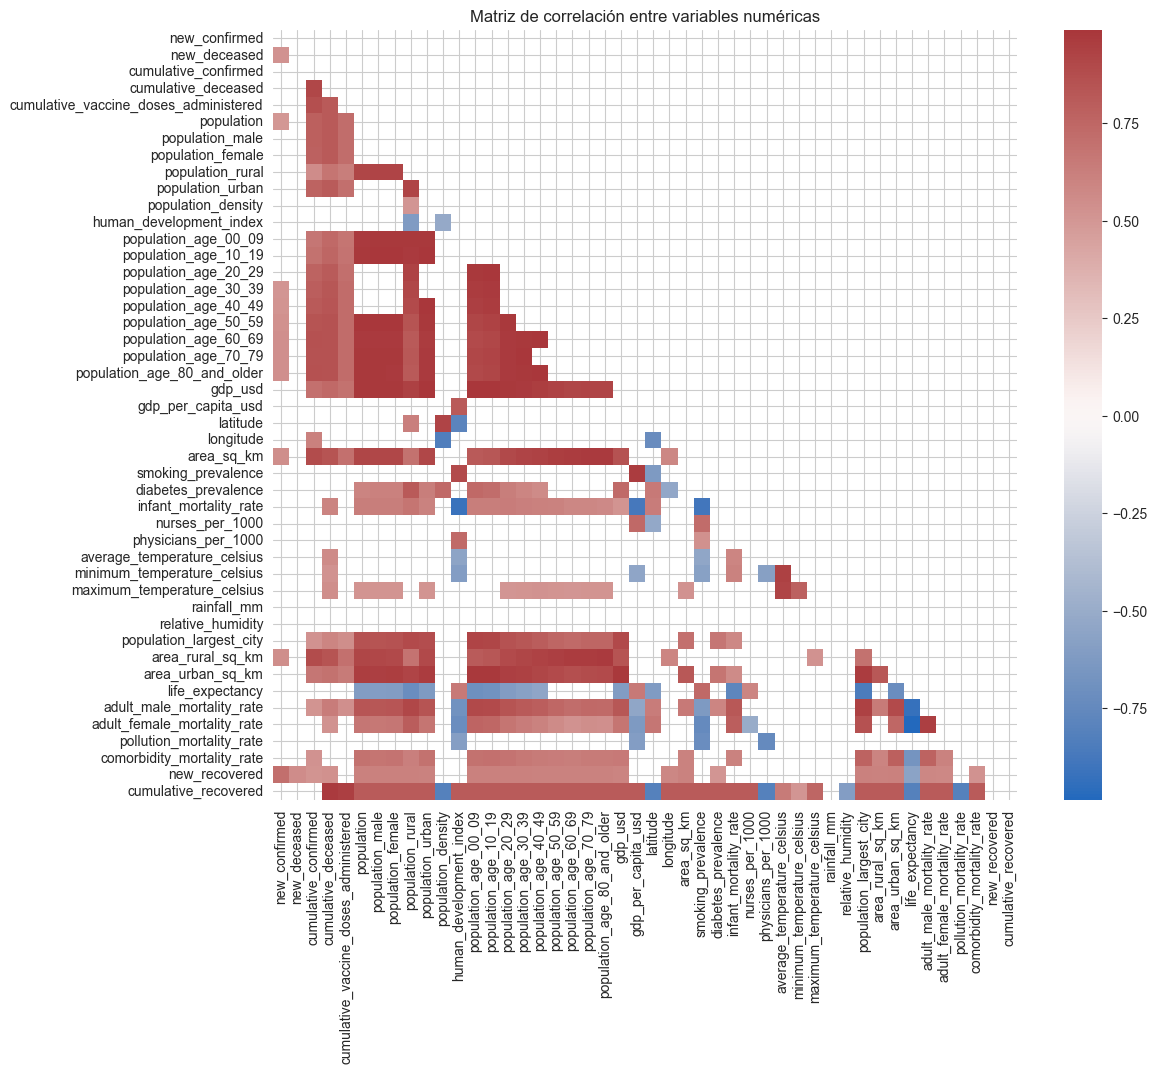

In [11]:
# 3.4 Heatmap de la matriz completa
plt.figure(figsize=(12,10))
sns.heatmap(strong_corr, mask=mask, cmap='vlag', center=0)
plt.title("Matriz de correlación entre variables numéricas")
plt.show()


Histogramas y Gráficos de Densidad para variables clave.


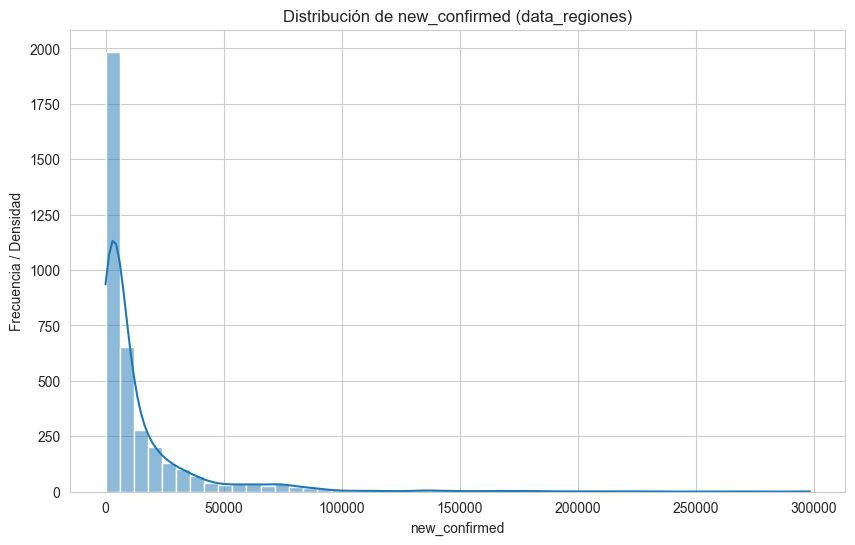

In [12]:
datos_regiones['new_confirmed'] = np.abs(datos_regiones['new_confirmed'])

# --- Variable 1: Casos Nuevos Confirmados
variable_covid_incidencia = 'new_confirmed'

# Usar Seaborn para crear un histograma con KDE
plt.figure(figsize=(10, 6)) # Tamaño figura
sns.histplot(data=datos_regiones, x=variable_covid_incidencia, kde=True, bins=50) # Usamos data=data_regiones
plt.title(f'Distribución de {variable_covid_incidencia} (data_regiones)')
plt.xlabel(variable_covid_incidencia)
plt.ylabel('Frecuencia / Densidad')
plt.show()

# Los gráficos se basan solo en los valores no nulos.

Vista previa de datos agregados por suma:
              new_confirmed  new_deceased
country_name                             
Argentina         8008050.0       83455.0
Brazil           26894006.0      490254.0
Chile             3791320.0       44214.0
Colombia          4597457.0      115137.0
Mexico            5514585.0      178555.0
Peru              3120681.0      122440.0

Vista previa de datos agregados por media:
              population_density  average_temperature_celsius
country_name                                                 
Argentina                 16.515                    17.195753
Brazil                    25.431                    28.016656
Chile                     25.710                    15.259943
Colombia                  45.861                    20.186508
Mexico                    66.325                    19.444047
Peru                      25.759                    26.050207


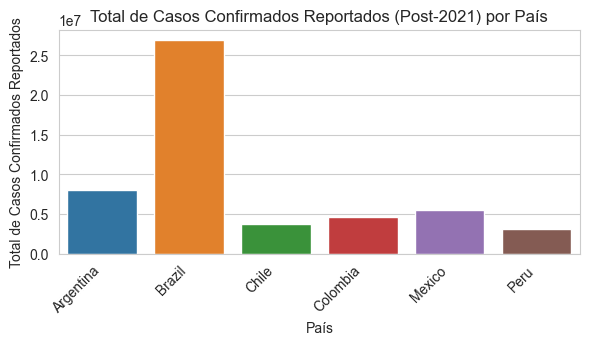

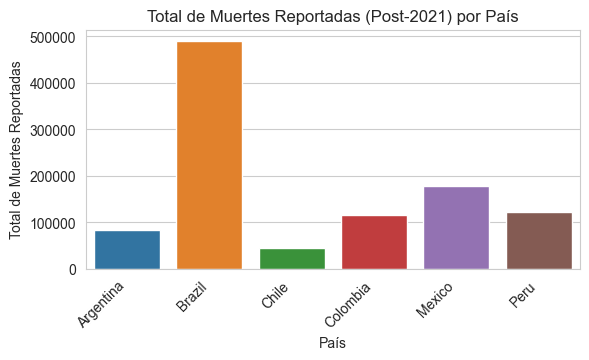

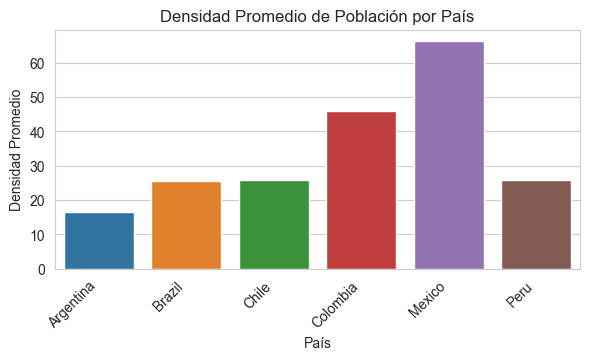

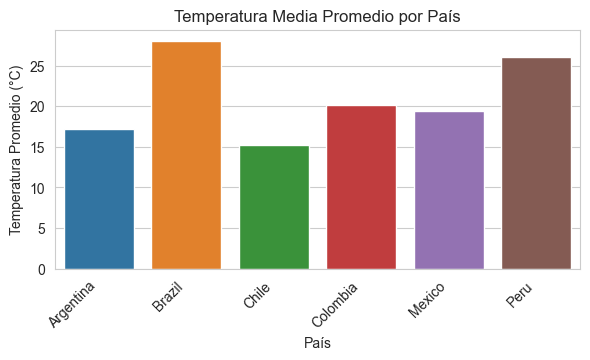

In [13]:
# Definir métricas que queremos SUMAR por país
metricas_sumar = ['new_confirmed', 'new_deceased']

# Definir métricas que queremos PROMEDIAR por país
metricas_promediar = ['population_density', 'average_temperature_celsius']

# Agrupar por país y calcular las sumas para las métricas de suma
df_agregado_sum = datos_regiones.groupby('country_name')[metricas_sumar].sum() # Usamos datos_regiones

# Agrupar por país y calcular las medias para las métricas de promedio
df_agregado_mean = datos_regiones.groupby('country_name')[metricas_promediar].mean() # Usamos datos_regiones

    # NOTA: df_agregado_sum y df_agregado_mean son DataFrames donde el índice son los países


print("Vista previa de datos agregados por suma:")
print(df_agregado_sum)
print("\nVista previa de datos agregados por media:")
print(df_agregado_mean)

# --- Crear gráficos de barras ---

# Gráfico 1: Total de Casos Nuevos Confirmados por País
plt.figure(figsize=(6, 3.708))
sns.barplot(x=df_agregado_sum.index, y=df_agregado_sum['new_confirmed'], hue=df_agregado_sum.index)
plt.title('Total de Casos Confirmados Reportados (Post-2021) por País')
plt.xlabel('País')
plt.ylabel('Total de Casos Confirmados Reportados')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico 2: Total de Nuevas Muertes por País
plt.figure(figsize=(6, 3.708))
sns.barplot(x=df_agregado_sum.index, y=df_agregado_sum['new_deceased'], hue=df_agregado_sum.index)
plt.title('Total de Muertes Reportadas (Post-2021) por País')
plt.xlabel('País')
plt.ylabel('Total de Muertes Reportadas')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Gráfico 3: Promedio de Densidad de Población por País
plt.figure(figsize=(6, 3.708))
sns.barplot(x=df_agregado_mean.index, y=df_agregado_mean['population_density'], hue = df_agregado_mean.index)
plt.title('Densidad Promedio de Población por País')
plt.xlabel('País')
plt.ylabel('Densidad Promedio')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
   
# Gráfico 4: Promedio de Temperatura Media por País
plt.figure(figsize=(6, 3.708))
sns.barplot(x=df_agregado_mean.index, y=df_agregado_mean['average_temperature_celsius'], hue = df_agregado_mean.index)
plt.title('Temperatura Media Promedio por País')
plt.xlabel('País')
plt.ylabel('Temperatura Promedio (°C)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Diagramas de dispersión Temperatura

country_name
Argentina    17.195753
Brazil       28.016656
Chile        15.259943
Colombia     20.186508
Mexico       19.444047
Peru         26.050207
Name: average_temperature_celsius, dtype: float64


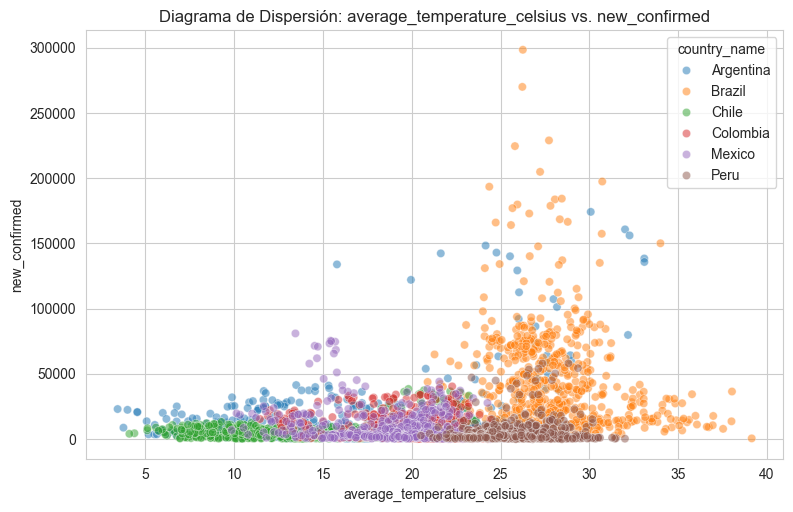

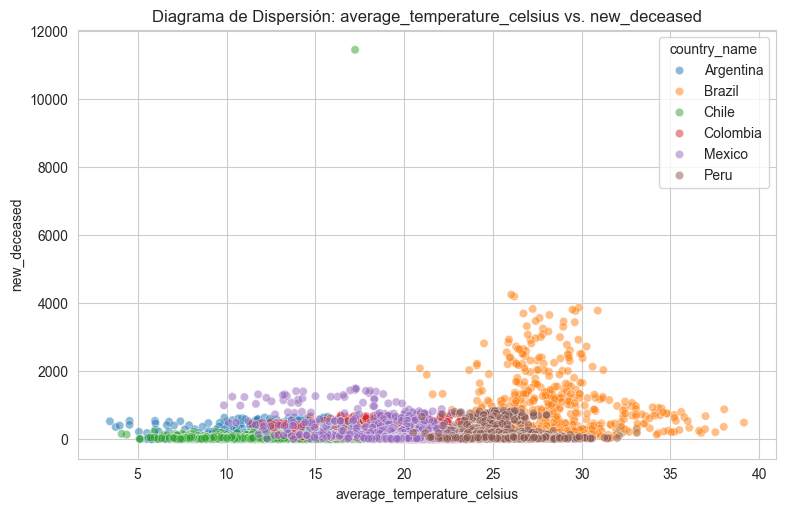

In [14]:
print(df_agregado_mean['average_temperature_celsius'])

# --- Gráfico 1: Temperatura Media vs. Casos Nuevos Confirmados ---
variable_temp = 'average_temperature_celsius'
variable_casos_nuevos = 'new_confirmed'
variable_color_pais = 'country_name'

plt.figure(figsize=(9, 5.562)) # Tamaño figura
sns.scatterplot(data=datos_regiones, x=variable_temp, y=variable_casos_nuevos, alpha=.5, hue=variable_color_pais)
plt.title(f'Diagrama de Dispersión: {variable_temp} vs. {variable_casos_nuevos}')
plt.xlabel(variable_temp)
plt.ylabel(variable_casos_nuevos)
plt.grid(True) # Añadir cuadrícula
plt.show()

# Nota: Este gráfico puede mostrar muchos puntos agrupados cerca del eje Y=0 debido a los días con cero o pocos casos reportados.
# Los valores extremos de casos pueden dominar el gráfico.

# --- Gráfico 2: Temperatura Media vs. Nuevas Muertes Confirmadas ---
variable_muertes_nuevas = 'new_deceased'

plt.figure(figsize=(9, 5.562))
sns.scatterplot(data=datos_regiones, x=variable_temp, y=variable_muertes_nuevas, alpha=.5, hue=variable_color_pais)
plt.title(f'Diagrama de Dispersión: {variable_temp} vs. {variable_muertes_nuevas}')
plt.xlabel(variable_temp)
plt.ylabel(variable_muertes_nuevas)
plt.grid(True)
plt.show()


Boxplot de temperatura media por país

              count   mean   std    min    25%    50%    75%    max
country_name                                                       
Argentina     619.0  17.20  6.25   3.43  12.11  16.71  22.48  33.09
Brazil        618.0  28.02  2.95  17.44  26.31  27.73  29.42  39.14
Chile         619.0  15.26  5.24   4.09  10.95  14.77  19.93  26.17
Colombia      618.0  20.19  2.53  11.44  19.08  20.79  22.03  24.47
Mexico        618.0  19.44  3.16   9.86  17.48  19.87  21.54  26.57
Peru          616.0  26.05  1.88  20.51  24.72  25.96  27.30  32.00


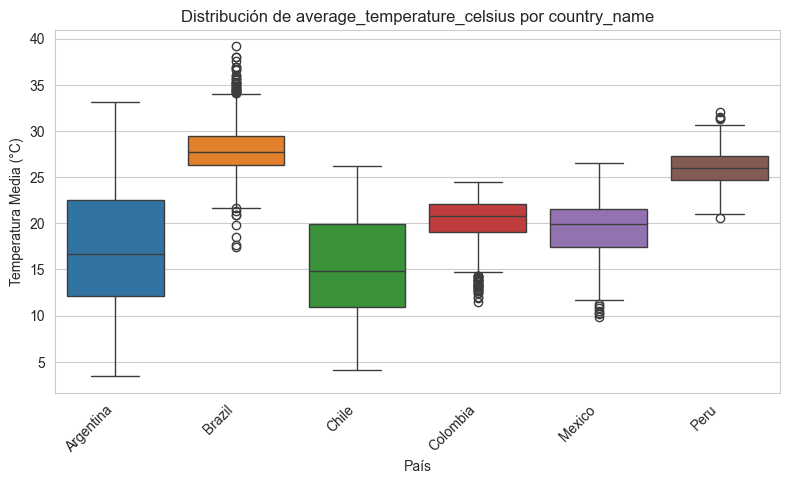

In [15]:
variable_categoria = 'country_name'
variable_numerica = 'average_temperature_celsius'

descripcion = datos_regiones.groupby(variable_categoria)[variable_numerica].describe()
print(descripcion.round(2))


plt.figure(figsize=(8, 4.944)) # Ajustar tamaño figura
sns.boxplot(data=datos_regiones, x=variable_categoria, y=variable_numerica, hue = datos_regiones[variable_categoria]) # x es la categoría, y es la variable numérica
plt.title(f'Distribución de {variable_numerica} por {variable_categoria}')
plt.xlabel('País')
plt.ylabel('Temperatura Media (°C)')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas de país si se superponen
plt.tight_layout()
plt.show()

Violinplots para Variables con Variación por País

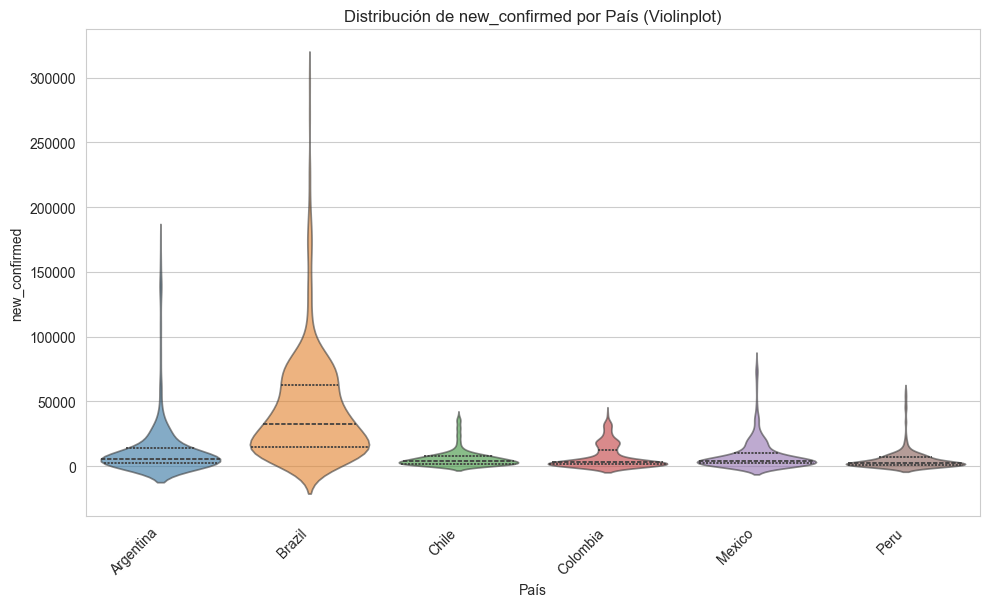

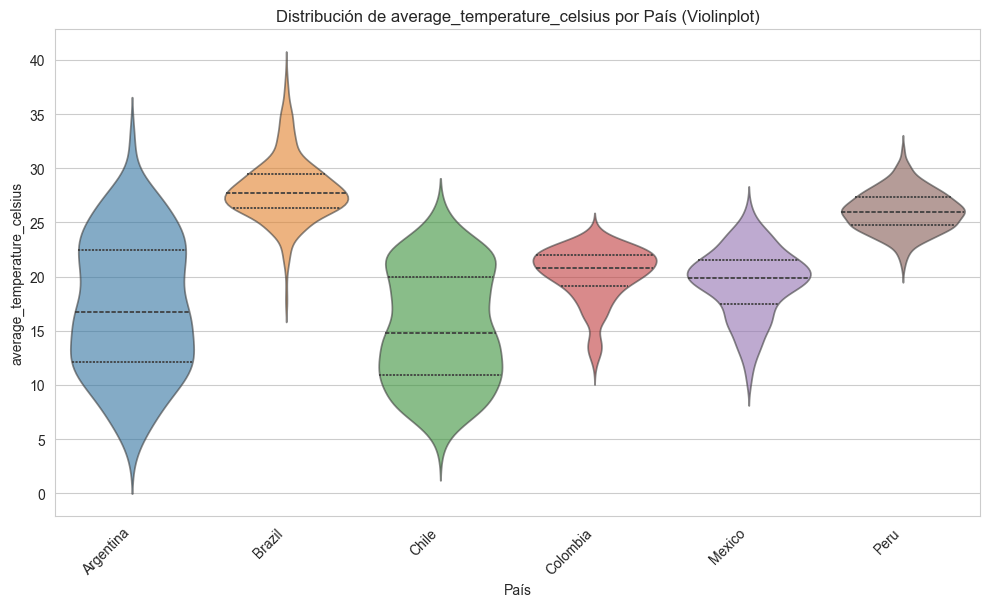

In [16]:
variable_categoria = 'country_name'

# Variables numéricas que típicamente cambian de valor a lo largo del tiempo o ubicación
variable_cambio_1 = 'new_confirmed'
variable_cambio_2 = 'average_temperature_celsius' # La temperatura cambia por location_key y fecha

#*******************************
# paises_a_excluir = ['Brazil', 'Argentina']
# mascara_excluir = datos_regiones['country_name'].isin(paises_a_excluir) # True donde ES Brasil o Argentina
# mascara_no_excluir = ~mascara_excluir # True donde NO ES Brasil ni Argentina

# data_sin_excluidos = datos_regiones[mascara_no_excluir]
#*********************************************************
# --- Violinplot para Casos Nuevos Confirmados por País ---

plt.figure(figsize=(10, 6.18)) # Ajustar tamaño figura
    # alpha=0.6 para transparencia, inner='quartile' muestra la mediana y cuartiles dentro del violín
sns.violinplot(data=datos_regiones, x=variable_categoria, y=variable_cambio_1, alpha=0.6, inner='quartile', hue=variable_categoria)
plt.title(f'Distribución de {variable_cambio_1} por País (Violinplot)')
plt.xlabel('País')
plt.ylabel(variable_cambio_1)
plt.xticks(rotation=45, ha='right') # Rotar etiquetas de país
plt.tight_layout()
plt.show()

# Noota: Debido a la alta frecuencia de valores cero en 'new_confirmed', los violines
# probablemente estarán muy delgados cerca de cero y ensancharán donde haya más reportes.
# Esto refleja el patrón de reporte o la concentración de casos.


# --- Violinplot para Temperatura Media por País ---
plt.figure(figsize=(10, 6.18))
sns.violinplot(data=datos_regiones, x=variable_categoria, y=variable_cambio_2, alpha=0.6, inner='quartile', hue=variable_categoria)
plt.title(f'Distribución de {variable_cambio_2} por País (Violinplot)')
plt.xlabel('País')
plt.ylabel(variable_cambio_2)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Nota: Este gráfico debería mostrar formas que reflejen mejor la distribución de la temperatura,
# que puede ser más variada o bimodal en países con diferentes climas o topografías.

Distribución de la población por grupos de edad

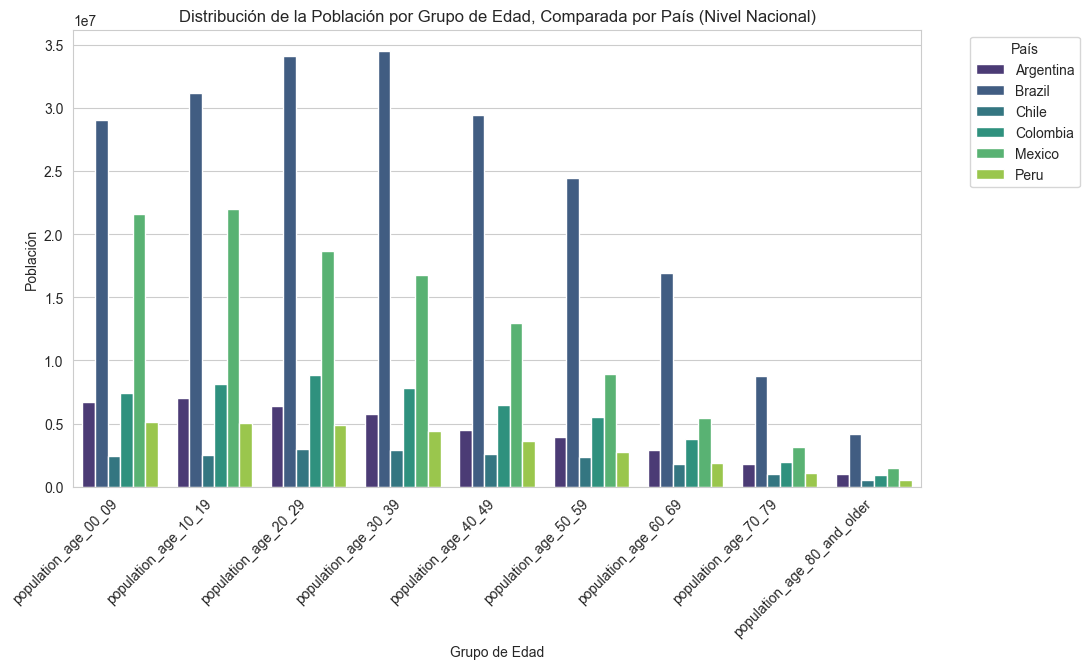

In [17]:
# --- Paso 1: Identificar las columnas de grupos de edad ---
columnas_edad = ['population_age_00_09','population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59', 'population_age_60_69','population_age_70_79', 'population_age_80_and_older']

# De las filas a nivel de país, seleccionar una fila representativa por cada país.
# Como la población es constante a este nivel, cualquier fila sirve. Tomaremos la primera encontrada por país.
df_poblacion_pais_unica = datos_regiones.groupby('country_name').head(1).copy()

# --- Paso 4: Seleccionar columnas relevantes y reestructurar (melt) ---
# Seleccionar las columnas de edad válidas y la columna del nombre del país
columnas_para_melt = columnas_edad + ['country_name']
df_poblacion_melt = df_poblacion_pais_unica[columnas_para_melt]

    # Usar melt para transformar las columnas de edad en filas
    # id_vars: Columnas que se mantienen como identificadores (el país)
    # value_vars: Columnas cuyos valores se convertirán en una sola columna de 'valor'
    # var_name: Nombre para la nueva columna que contendrá los nombres originales de las columnas (los grupos de edad)
    # value_name: Nombre para la nueva columna que contendrá los valores originales (la población)
df_poblacion_melted = df_poblacion_melt.melt(
    id_vars=['country_name'],
    value_vars=columnas_edad,
    var_name='Grupo de Edad',
    value_name='Población'
)

# --- Paso 5: Crear el gráfico de barras AGRUPADO ---
plt.figure(figsize=(11, 6.798)) # Ajustar tamaño figura
# Crear el gráfico de barras agrupado
sns.barplot(
    data=df_poblacion_melted,
    x='Grupo de Edad',       # Eje X: los diferentes grupos de edad
    y='Población',           # Eje Y: la población para ese grupo/país
    hue='country_name',      # Agrupar las barras por país y usar color para distinguir
    palette='viridis'        # Paleta de colores
)

plt.title('Distribución de la Población por Grupo de Edad, Comparada por País (Nivel Nacional)')
plt.xlabel('Grupo de Edad')
plt.ylabel('Población')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas del eje X
plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left') # Mover leyenda fuera del gráfico
plt.tight_layout()
plt.show()


Diagrama de Barras Apilado - Tasa de Mortalidad por Género por País

              adult_male_mortality_rate  adult_female_mortality_rate
country_name                                                        
Argentina                         147.1                         79.5
Brazil                            188.5                         91.4
Chile                             107.7                         59.0
Colombia                          151.6                         78.0
Mexico                            184.4                         95.8
Peru                              146.4                         84.8


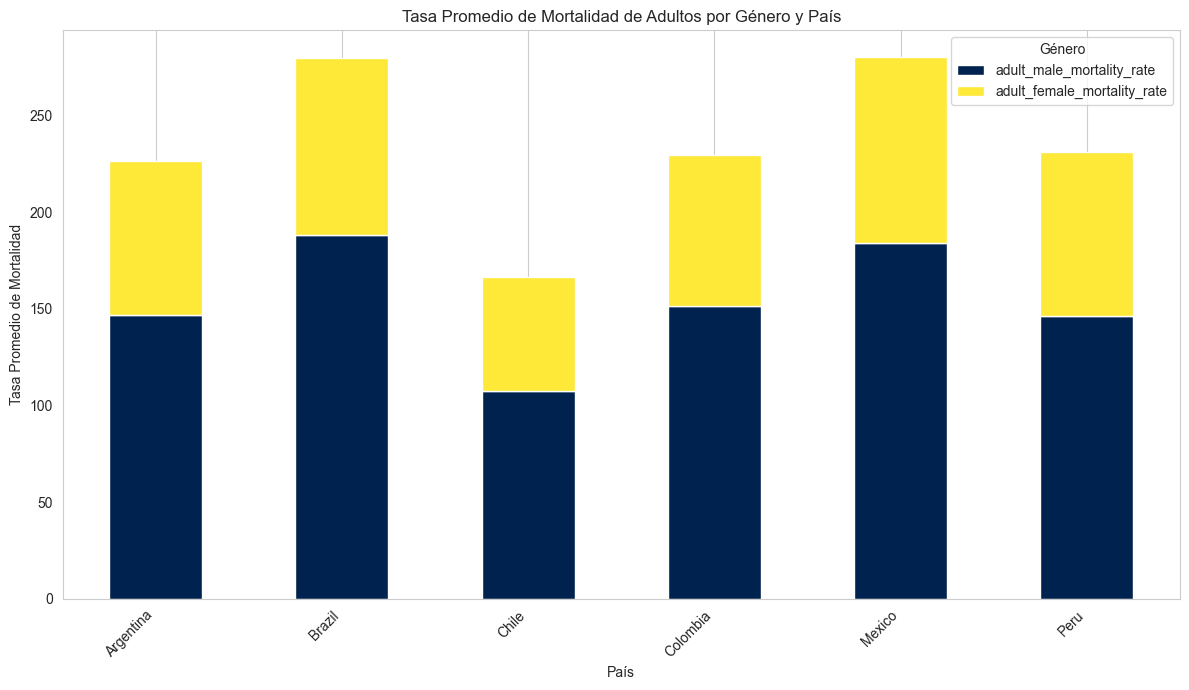

In [18]:
# --- Paso 1: Identificar columnas de tasas de mortalidad por género ---
columnas_mortalidad = ['adult_male_mortality_rate', 'adult_female_mortality_rate']


# --- Paso 2: Agrupar por País y calcular la tasa de mortalidad promedio ---
# Agrupamos por país y calculamos la media para las columnas de mortalidad por género.
# --- CORRECCIÓN AQUÍ: Usamos datos_regiones en lugar de datos_regogenes ---
df_mortalidad_agg = datos_regiones.groupby('country_name')[columnas_mortalidad].mean()
print(df_mortalidad_agg.round(1))
# --- Paso 3: Crear el diagrama de barras apilado ---
plt.figure(figsize=(5, 3.09)) # Ajustar tamaño figura

df_mortalidad_agg.plot(kind='bar', stacked=True, figsize=(12, 7), ax=plt.gca(), cmap='cividis') # ax=plt.gca() usa la figura actual

plt.title('Tasa Promedio de Mortalidad de Adultos por Género y País')
plt.xlabel('País')
plt.ylabel('Tasa Promedio de Mortalidad')
plt.xticks(rotation=45, ha='right') # Rotar etiquetas de país
plt.legend(title='Género') # Título de la leyenda
plt.grid(axis='y') # Añadir cuadrícula solo en el eje Y
plt.tight_layout()
plt.show()

## Avance 3

In [ ]:
# Importar las librerías necesarias para el Avance 3
import pandas as pd
import numpy as np

# Matplotlib y Seaborn para visualización
import matplotlib.pyplot as plt
import seaborn as sns

import geopandas as gpd
import folium

In [ ]:
datos_regiones = pd.read_csv(r'C:\Users\Efrain Chapal\Documents\Henry\Proyectos\DataPorRegiones32.csv', sep=',', parse_dates=['date'])

In [ ]:
datos_regiones.info()

Cobertura de vacunación y nuevos casos por país

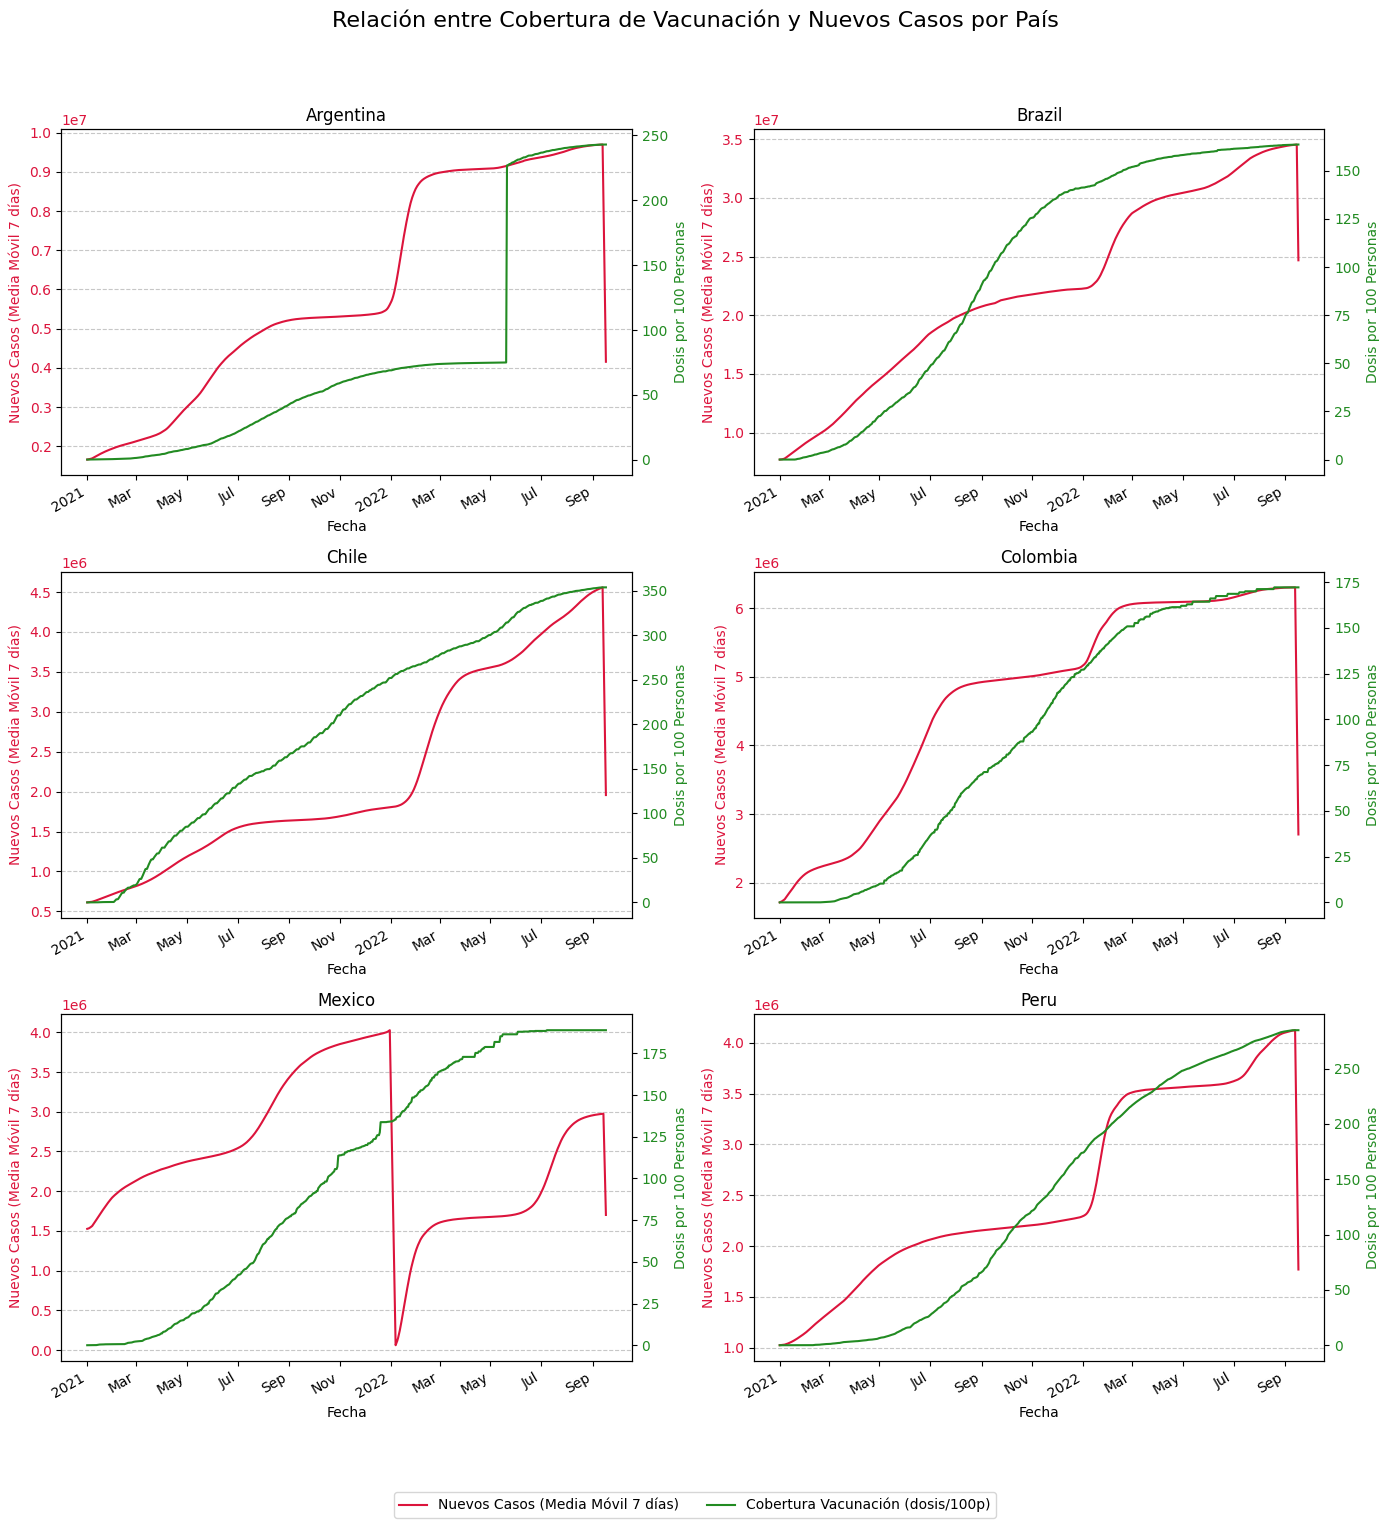

In [ ]:
import matplotlib.dates as mdates # Para formatear fechas

# 1. Preparar datos de vacunación
# La columna es 'cumulative_vaccine_doses_administered'.
# Rellenar NaNs: como es acumulativo, el forward fill es adecuado.
# Asegúrate de hacerlo DENTRO de cada grupo de país para no arrastrar datos entre países.
datos_regiones['cumulative_vaccine_doses_administered_filled'] = datos_regiones.groupby('country_name')['cumulative_vaccine_doses_administered'].transform(
    lambda x: x.ffill().fillna(0) # ffill y luego fillna(0) si el primer valor del grupo es NaN
)

# 2. Calcular la "Cobertura de Vacunación" como dosis administradas por 100 personas.
# Esto normaliza por población y es una métrica común.
# Evitar división por cero si 'population' pudiera ser 0 o NaN.
if (datos_regiones['population'] == 0).any() or datos_regiones['population'].isnull().any():
    print("Advertencia: 'population' contiene ceros o NaNs. Se reemplazarán temporalmente para el cálculo de cobertura.")
    # Crea una copia segura de la población para el cálculo, reemplazando 0 o NaN con un valor que no cause error (o pd.NA si la división lo maneja)
    # Aquí, si es 0 o NaN, la cobertura será NaN o 0 si el numerador es 0.
    datos_regiones['population_safe'] = datos_regiones['population'].replace(0, pd.NA) # pd.NA resultará en NaNs en la división
else:
    datos_regiones['population_safe'] = datos_regiones['population']

datos_regiones['vaccination_coverage_per_100'] = \
    (datos_regiones['cumulative_vaccine_doses_administered_filled'] / datos_regiones['population_safe']) * 100
datos_regiones['vaccination_coverage_per_100'] = datos_regiones['vaccination_coverage_per_100'].fillna(0) # Rellenar NaNs resultantes (ej. si population_safe era NA) con 0

# 3. Graficar para cada país
datos_regiones_plot_vac_cases = datos_regiones.sort_values(by=['country_name', 'date'])
countries = datos_regiones_plot_vac_cases['country_name'].unique()
num_countries = len(countries)
col_wrap = min(num_countries, 2) # Ajusta esto, e.g., 2 o 3 columnas de gráficas
num_rows = (num_countries + col_wrap - 1) // col_wrap

fig, axes = plt.subplots(num_rows, col_wrap, figsize=(col_wrap * 7, num_rows * 5), squeeze=False) # Ajusta figsize
axes_flat = axes.flatten()

# Variables para almacenar las líneas para la leyenda global
legend_lines = []
legend_labels = []

for i, country in enumerate(countries):
    ax1 = axes_flat[i]
    country_data = datos_regiones_plot_vac_cases[datos_regiones_plot_vac_cases['country_name'] == country].copy() # Usar .copy() para evitar SettingWithCopyWarning

    # Eje Y1 para Nuevos Casos (Media Móvil)
    color1 = 'crimson'
    sns.lineplot(data=country_data, x='date', y='new_confirmed_rolling_avg', ax=ax1, color=color1, label='Nuevos Casos (Media Móvil 7 días)')
    ax1.set_ylabel('Nuevos Casos (Media Móvil 7 días)', color=color1, fontsize=10)
    ax1.tick_params(axis='y', labelcolor=color1)
    ax1.set_xlabel('Fecha')
    ax1.set_title(country, fontsize=12)
    ax1.grid(axis='y', linestyle='--', alpha=0.7)

    # Eje Y2 para Cobertura de Vacunación
    ax2 = ax1.twinx() # Compartir el mismo eje X
    color2 = 'forestgreen'
    sns.lineplot(data=country_data, x='date', y='vaccination_coverage_per_100', ax=ax2, color=color2, label='Cobertura Vacunación (dosis/100p)')
    ax2.set_ylabel('Dosis por 100 Personas', color=color2, fontsize=10)
    ax2.tick_params(axis='y', labelcolor=color2)

    # Formatear fechas en el eje X para mayor claridad
    ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))
    for label in ax1.get_xticklabels():
        label.set_rotation(30) # Rotar etiquetas de fecha
        label.set_ha('right')  # Alineación horizontal

    # Guardar líneas para leyenda (solo del primer subplot, ya que son las mismas)
    if i == 0:
        lines_ax1, labels_ax1 = ax1.get_legend_handles_labels()
        lines_ax2, labels_ax2 = ax2.get_legend_handles_labels()
        legend_lines.extend(lines_ax1)
        legend_lines.extend(lines_ax2)
        legend_labels.extend(labels_ax1)
        legend_labels.extend(labels_ax2)
    # Remover leyendas individuales de subplots
    ax1.get_legend().remove() if ax1.get_legend() else None
    ax2.get_legend().remove() if ax2.get_legend() else None


# Eliminar ejes no utilizados
for j in range(num_countries, len(axes_flat)):
    fig.delaxes(axes_flat[j])

# Crear una leyenda general para la figura
fig.legend(legend_lines, legend_labels, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.01 if num_rows > 1 else 0.02)) # Ajustar bbox_to_anchor

fig.suptitle('Relación entre Cobertura de Vacunación y Nuevos Casos por País', fontsize=16, y=1.0)
plt.tight_layout(rect=[0, 0.05, 1, 0.97]) # Ajustar rect para dejar espacio a leyenda y título
plt.show()

# (Opcional) Revisar algunos datos para verificar
# print(datos_regiones[['country_name', 'date', 'cumulative_vaccine_doses_administered_filled', 'population', 'vaccination_coverage_per_100', 'new_confirmed_rolling_avg']].sample(5))

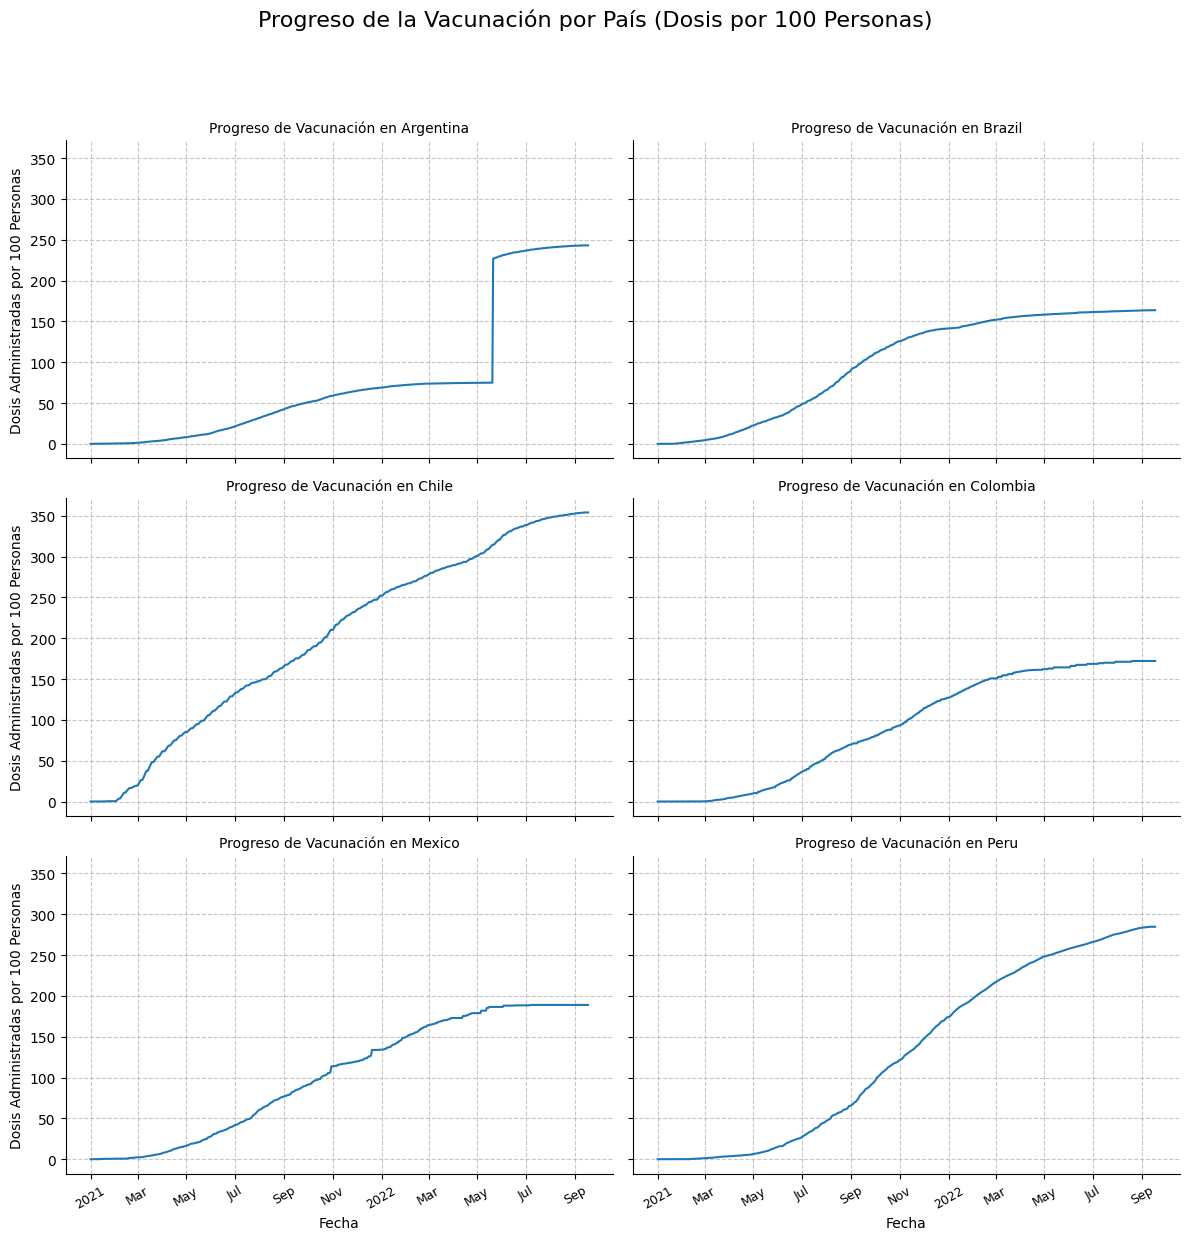

In [ ]:

import matplotlib.dates as mdates


# Si 'vaccination_coverage_per_100' no existe
if 'vaccination_coverage_per_100' not in datos_regiones.columns:
    print("Recalculando 'vaccination_coverage_per_100'...")
    # 1. Rellenar NaNs en 'cumulative_vaccine_doses_administered'
    datos_regiones['cumulative_vaccine_doses_administered_filled'] = datos_regiones.groupby('country_name')['cumulative_vaccine_doses_administered'].transform(
        lambda x: x.ffill().fillna(0)
    )
    # 2. Preparar 'population_safe'
    if (datos_regiones['population'] == 0).any() or datos_regiones['population'].isnull().any():
        datos_regiones['population_safe'] = datos_regiones['population'].replace(0, pd.NA)
    else:
        datos_regiones['population_safe'] = datos_regiones['population']
    # 3. Calcular cobertura
    datos_regiones['vaccination_coverage_per_100'] = \
        (datos_regiones['cumulative_vaccine_doses_administered_filled'] / datos_regiones['population_safe']) * 100
    datos_regiones['vaccination_coverage_per_100'] = datos_regiones['vaccination_coverage_per_100'].fillna(0)
    print("'vaccination_coverage_per_100' calculada/recalculada.")
# --- Fin: Bloque de recálculo ---

# 1. Preparar datos para graficar
datos_progreso_vac = datos_regiones.sort_values(by=['country_name', 'date'])

# 2. Graficar usando seaborn.relplot para facetas por país
g_progreso_vac = sns.relplot(
    data=datos_progreso_vac,
    x='date',
    y='vaccination_coverage_per_100',
    kind='line',
    col='country_name',
    col_wrap=2,  # Ajusta según el número de países (e.g., 3 para 6 países)
    height=4,
    aspect=1.5,
    facet_kws={'sharey': True} # 'True' para comparar niveles directamente, 'False' para escalas individuales
)

g_progreso_vac.set_titles("Progreso de Vacunación en {col_name}") # Título para cada subgráfica
g_progreso_vac.set_axis_labels("Fecha", "Dosis Administradas por 100 Personas") # Etiquetas para ejes X e Y

# Ajustar formato de fecha y rotación en cada subgráfica
for ax in g_progreso_vac.axes.flatten():
    if ax is not None: # Verificar si el eje existe (relplot puede crear ejes vacíos)
        ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
        ax.tick_params(axis='x', rotation=30, labelsize=9) # Rotar y ajustar tamaño de etiquetas de fecha
        ax.grid(True, linestyle='--', alpha=0.7)

# Título general para la figura
plt.suptitle('Progreso de la Vacunación por País (Dosis por 100 Personas)', fontsize=16, y=1.03) # Ajustar 
plt.tight_layout(rect=[0, 0, 1, 0.98]) # Ajustar layout para el título
plt.show()

# (Opcional) Mostrar algunos datos para revisión
# print(datos_progreso_vac[['country_name', 'date', 'vaccination_coverage_per_100']].sample(5))

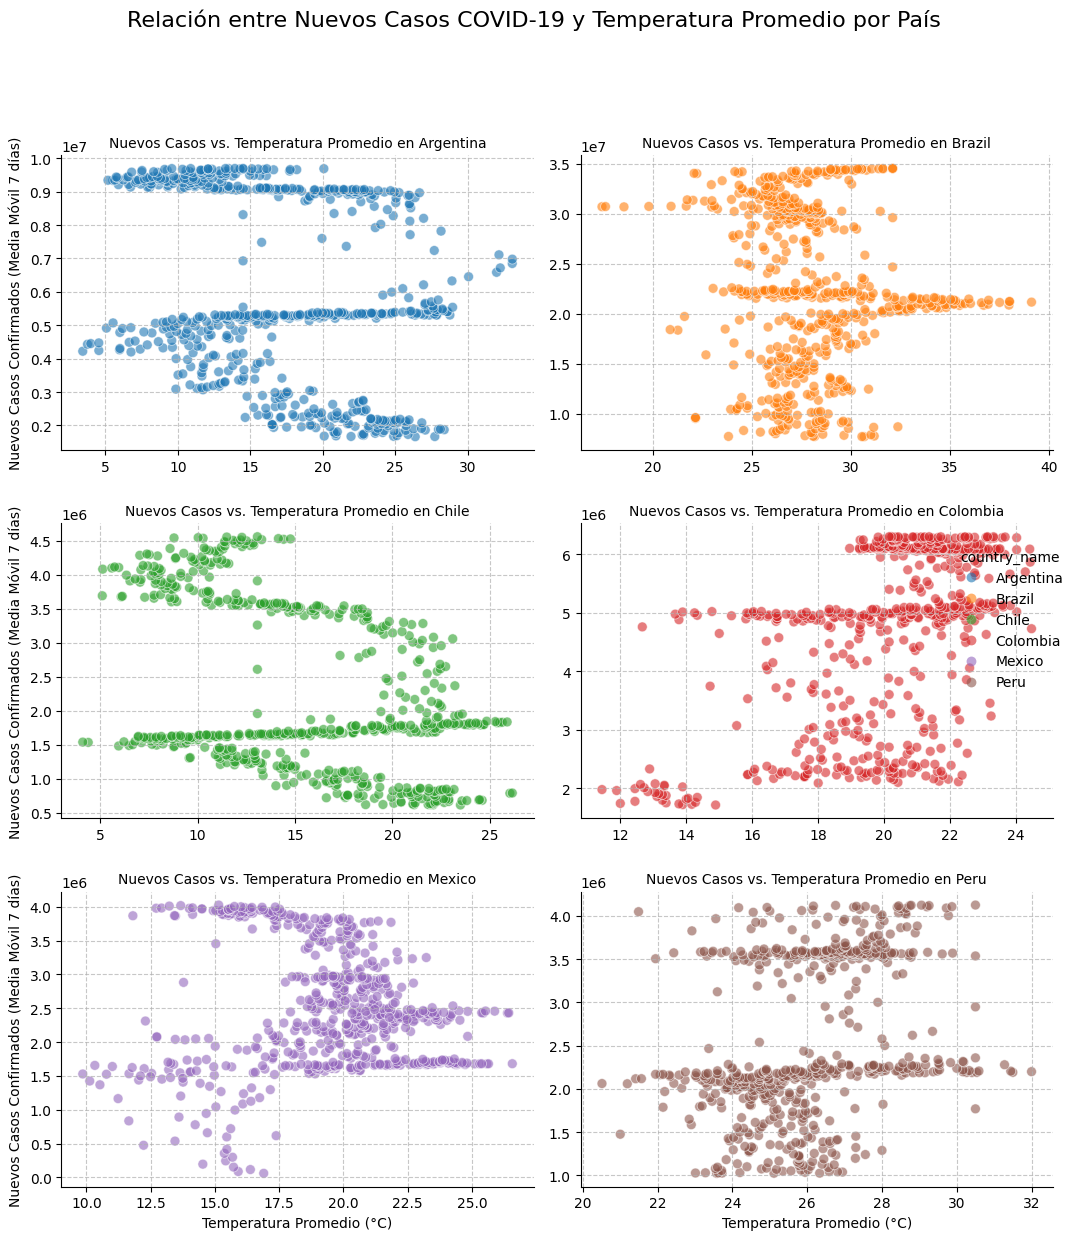

In [ ]:

if 'new_confirmed_rolling_avg' not in datos_regiones.columns:
    print("Calculando 'new_confirmed_rolling_avg'...")
    datos_regiones['new_confirmed_filled'] = datos_regiones.groupby('country_name')['new_confirmed'].transform(lambda x: x.fillna(0))
    datos_regiones['new_confirmed_rolling_avg'] = datos_regiones.groupby('country_name')['new_confirmed_filled'].transform(
        lambda x: x.rolling(window=7, min_periods=1).mean()
    )
    print("'new_confirmed_rolling_avg' calculada.")
# --- Fin: Bloque de recálculo ---

# 1. Manejar NaNs en 'average_temperature_celsius'
# Revisar cuántos NaNs hay:
# print(f"NaNs en 'average_temperature_celsius' antes: {datos_regiones['average_temperature_celsius'].isnull().sum()}")

# Estrategia de imputación: forward fill (propagación hacia adelante) dentro de cada país.
# Esto asume que la temperatura de un día es similar a la del día anterior si falta el dato.
datos_regiones['average_temperature_celsius_filled'] = datos_regiones.groupby('country_name')['average_temperature_celsius'].transform(
    lambda x: x.ffill().bfill() # ffill primero, luego bfill para los NaNs al inicio del grupo
)
# Si aún quedan NaNs (ej. si todos los valores de un país son NaN), se pueden rellenar con la media global o 0, o dejar como NaN.
# Por ahora, los dejaremos si bfill no los cubrió, Seaborn los omitirá.
# print(f"NaNs en 'average_temperature_celsius_filled' después: {datos_regiones['average_temperature_celsius_filled'].isnull().sum()}")


# 2. Preparar datos para graficar
# Eliminar filas donde alguna de las dos variables clave sea NaN para el scatter plot
datos_scatter_temp_cases = datos_regiones.dropna(subset=['new_confirmed_rolling_avg', 'average_temperature_celsius_filled'])
datos_scatter_temp_cases = datos_scatter_temp_cases.sort_values(by=['country_name', 'date'])


# 3. Graficar usando seaborn.relplot para scatter plots facetados
g_temp_cases = sns.relplot(
    data=datos_scatter_temp_cases,
    x='average_temperature_celsius_filled',
    y='new_confirmed_rolling_avg',
    hue='country_name',  # Opcional: colorear por país si no se usan facetas o para destacar en facetas
    col='country_name',
    col_wrap=2,        # Ajusta según el número de países
    kind='scatter',
    height=4,
    aspect=1.2,
    alpha=0.6,         # Transparencia de los puntos
    s=50,              # Tamaño de los puntos
    facet_kws={'sharex': False, 'sharey': False} # No compartir ejes, ya que rangos pueden variar mucho
)

g_temp_cases.set_titles("Nuevos Casos vs. Temperatura Promedio en {col_name}")
g_temp_cases.set_axis_labels("Temperatura Promedio (°C)", "Nuevos Casos Confirmados (Media Móvil 7 días)")

# Rotar etiquetas del eje X si es necesario (generalmente no para scatter)
for ax in g_temp_cases.axes.flatten():
    if ax is not None:
        ax.grid(True, linestyle='--', alpha=0.7)
        # Opcional: Añadir una línea de regresión simple a cada faceta
        # sns.regplot(data=datos_scatter_temp_cases[datos_scatter_temp_cases['country_name'] == ax.get_title().split(' en ')[-1]],
        #             x='average_temperature_celsius_filled',
        #             y='new_confirmed_rolling_avg',
        #             ax=ax,
        #             scatter=False, # No dibujar los puntos de nuevo
        #             color='red',
        #             line_kws={'lw': 2, 'ls': '--'})


plt.suptitle('Relación entre Nuevos Casos COVID-19 y Temperatura Promedio por País', fontsize=16, y=1.03)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

# (Opcional) Revisar correlaciones numéricas por país
# for country in datos_scatter_temp_cases['country_name'].unique():
#     country_data = datos_scatter_temp_cases[datos_scatter_temp_cases['country_name'] == country]
#     correlation = country_data['average_temperature_celsius_filled'].corr(country_data['new_confirmed_rolling_avg'])
#     print(f"Correlación entre temperatura y nuevos casos para {country}: {correlation:.2f}")

Impacto de la urbanización en la propagación del covid

--- Urban Data (de la primera entrada por país) ---
  country_name  percentage_urban_population
0    Argentina                    91.991001
1       Brazil                    86.207259
2        Chile                    94.515376
3     Colombia                    80.237791
4       Mexico                    92.463333
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   country_name                 6 non-null      object 
 1   percentage_urban_population  6 non-null      float64
dtypes: float64(1), object(1)
memory usage: 228.0+ bytes
None


--- Datos en el Máximo de Casos Confirmados Acumulados (antes del cálculo de tasa) ---
     country_name       date  cumulative_confirmed  population
616     Argentina 2022-09-09             9697763.0    44938712
1247       Brazil 2022-09-15            34568833.0   212559409
1870        

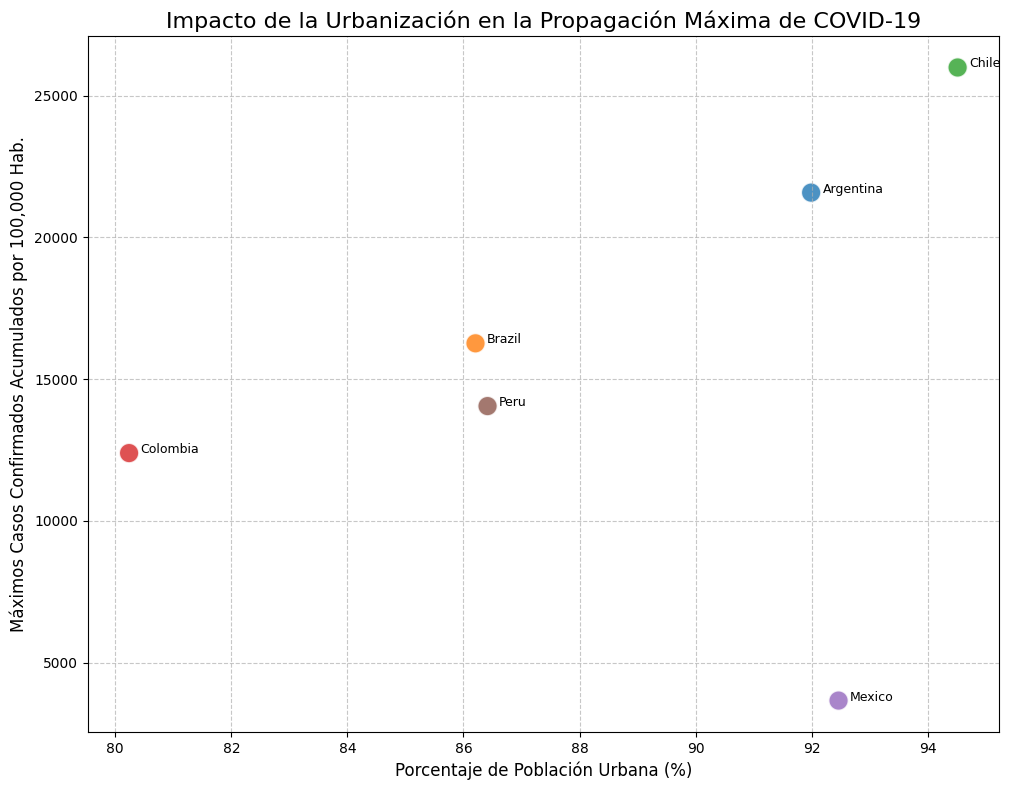

In [ ]:

# 1. Calcular la métrica de Urbanización (Porcentaje de Población Urbana)
# Tomamos el primer valor por país para los datos demográficos, asumiendo que son constantes.
urban_data_intermediate = datos_regiones.groupby('country_name').first()
urban_data_intermediate['percentage_urban_population'] = \
    (urban_data_intermediate['population_urban'] / urban_data_intermediate['population']) * 100
# Seleccionamos solo las columnas necesarias para evitar duplicados al unir
urban_data = urban_data_intermediate[['percentage_urban_population']].reset_index()

print("--- Urban Data (de la primera entrada por país) ---")
print(urban_data.head())
print(urban_data.info())
print("\n")

# 2. Calcular la métrica de Propagación del Covid-19
# Usaremos el MÁXIMO de Casos Confirmados Acumulados.
# .loc[...idxmax()] nos da la fila entera donde se encuentra el máximo 'cumulative_confirmed' para cada país.
max_confirmed_data_per_country = datos_regiones.loc[datos_regiones.groupby('country_name')['cumulative_confirmed'].idxmax()].copy()

print("--- Datos en el Máximo de Casos Confirmados Acumulados (antes del cálculo de tasa) ---")
# Mostramos las columnas relevantes para verificar
print(max_confirmed_data_per_country[['country_name', 'date', 'cumulative_confirmed', 'population']])
# Chequeamos NaNs en las columnas clave de estas filas seleccionadas
print(f"NaNs en 'cumulative_confirmed' (en filas de max): {max_confirmed_data_per_country['cumulative_confirmed'].isnull().sum()}")
print(f"NaNs en 'population' (en filas de max): {max_confirmed_data_per_country['population'].isnull().sum()}")
print("\n")

# Calcular la tasa de máximos casos acumulados por 100,000 habitantes
# Manejar posible división por cero o NaN en 'population'
max_confirmed_data_per_country['population_safe'] = max_confirmed_data_per_country['population'].replace(0, pd.NA) # Evita división por cero

max_confirmed_data_per_country['max_cumulative_confirmed_per_100k'] = \
    (max_confirmed_data_per_country['cumulative_confirmed'] / max_confirmed_data_per_country['population_safe']) * 100000

print("--- Datos en el Máximo de Casos Confirmados Acumulados (después del cálculo de tasa) ---")
print(max_confirmed_data_per_country[['country_name', 'max_cumulative_confirmed_per_100k']])
print(f"NaNs en 'max_cumulative_confirmed_per_100k': {max_confirmed_data_per_country['max_cumulative_confirmed_per_100k'].isnull().sum()}")
print("\n")

# 3. Unir las métricas en un solo DataFrame para el plot
propagation_metric = max_confirmed_data_per_country[['country_name', 'max_cumulative_confirmed_per_100k']]
impact_df = pd.merge(urban_data, propagation_metric, on='country_name', how='left') # how='left' para mantener todos los países de urban_data

print("--- Impact DF (listo para graficar) ---")
print(impact_df)
print(impact_df.info())
print(f"NaNs en Impact DF ('max_cumulative_confirmed_per_100k'): {impact_df['max_cumulative_confirmed_per_100k'].isnull().sum()}")
print("\n")

# Eliminar filas donde falte alguna de las métricas clave para la gráfica
impact_df_cleaned = impact_df.dropna(subset=['percentage_urban_population', 'max_cumulative_confirmed_per_100k'])

if impact_df_cleaned.empty:
    print("El DataFrame 'impact_df_cleaned' está vacío después de eliminar NaNs. No se puede generar la gráfica.")
else:
    # 4. Crear el diagrama de dispersión
    plt.figure(figsize=(12, 8))
    scatter_plot = sns.scatterplot(
        data=impact_df_cleaned,
        x='percentage_urban_population',
        y='max_cumulative_confirmed_per_100k', # Usamos la nueva columna
        hue='country_name',
        s=200, # Tamaño de los puntos
        alpha=0.8
    )

    # Anotar cada punto con el nombre del país
    for i in range(impact_df_cleaned.shape[0]):
        plt.text(
            x=impact_df_cleaned['percentage_urban_population'].iloc[i] + 0.2, # Offset para mejor visualización
            y=impact_df_cleaned['max_cumulative_confirmed_per_100k'].iloc[i], # Usamos la nueva columna
            s=impact_df_cleaned['country_name'].iloc[i],
            fontdict=dict(color='black', size=9)
        )
    
    # Decidir si mostrar leyenda o no (si hay pocos puntos, las anotaciones bastan)
    if impact_df_cleaned.shape[0] > 6: # Ejemplo: si hay más de 6 países, mostrar leyenda
        plt.legend(title='País', bbox_to_anchor=(1.05, 1), loc='upper left')
    elif impact_df_cleaned.shape[0] > 0 :
         scatter_plot.legend_ = None # Ocultar la leyenda si hay pocas anotaciones


    plt.title('Impacto de la Urbanización en la Propagación Máxima de COVID-19', fontsize=16)
    plt.xlabel('Porcentaje de Población Urbana (%)', fontsize=12)
    plt.ylabel('Máximos Casos Confirmados Acumulados por 100,000 Hab.', fontsize=12) # Etiqueta del eje Y actualizada
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout(rect=[0, 0, 0.85, 1]) # Ajustar rect si la leyenda se sale
    plt.show()

Evolución semanal de nuevos caso por COVID 19

--- Datos Semanales Agregados (muestra) ---
  country_name week_ending_date  weekly_new_cases
0    Argentina       2021-01-03         5009069.0
1    Argentina       2021-01-10        12105413.0
2    Argentina       2021-01-17        12665826.0
3    Argentina       2021-01-24        13161011.0
4    Argentina       2021-01-31        13584366.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 540 entries, 0 to 539
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   country_name      540 non-null    object        
 1   week_ending_date  540 non-null    datetime64[ns]
 2   weekly_new_cases  540 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 12.8+ KB
None
NaNs en 'weekly_new_cases': 0




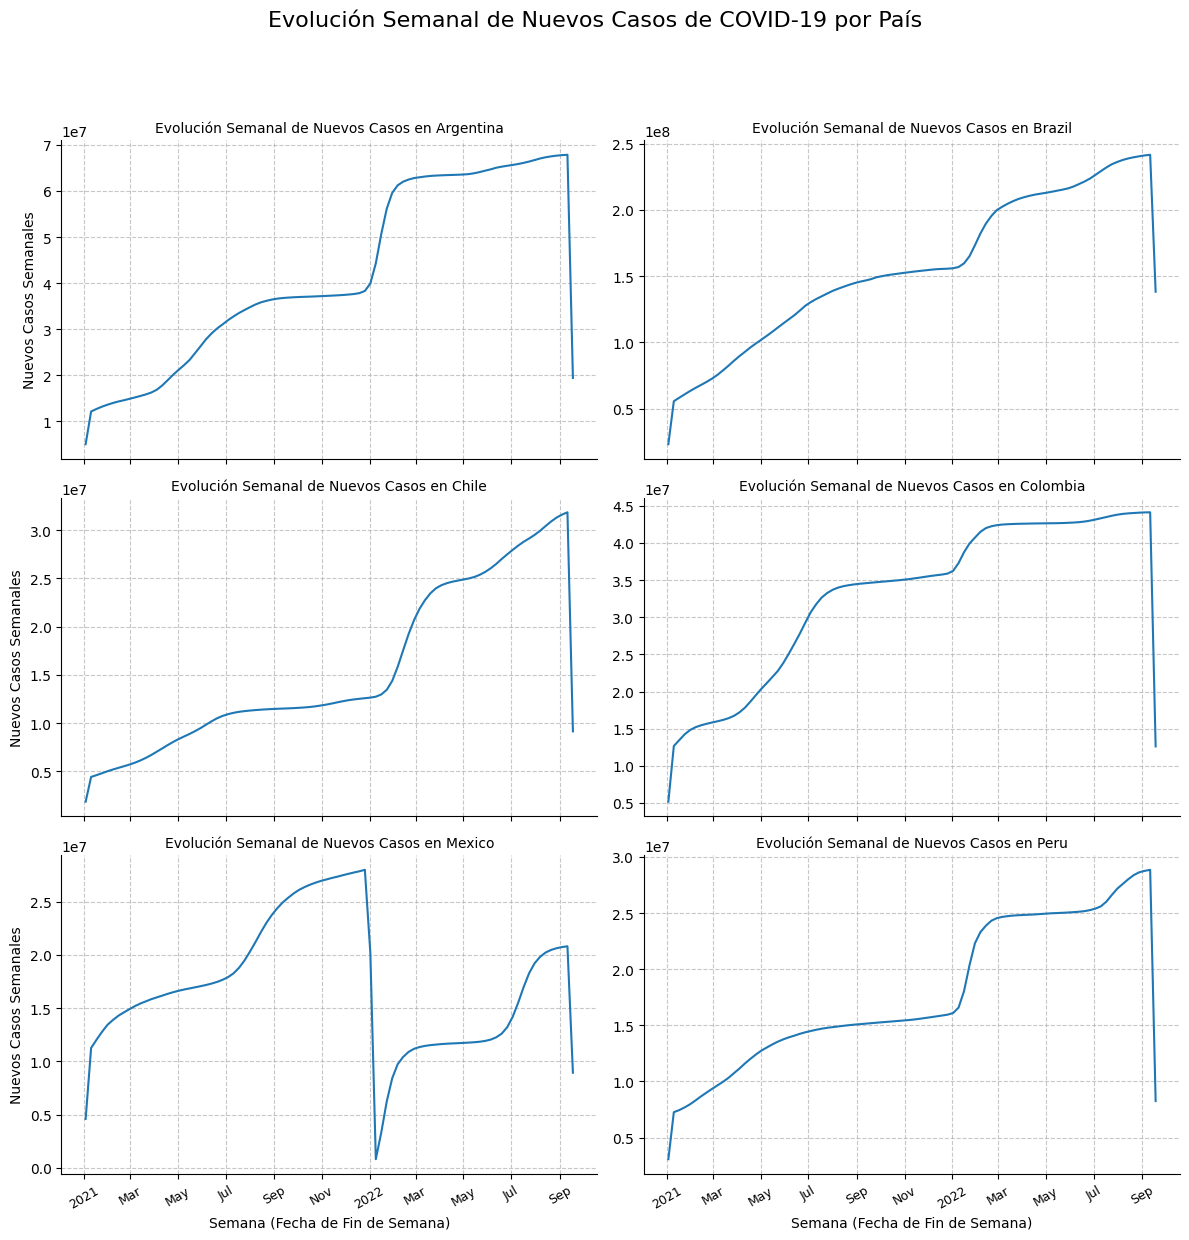

In [ ]:
# 1. Preparar la columna de nuevos casos confirmados
# Si ya tienes 'new_confirmed_filled' de pasos anteriores, puedes omitir esta parte.
# Si no, la creamos rellenando NaNs en 'new_confirmed' con 0.
if 'new_confirmed_filled' not in datos_regiones.columns:
    print("Creando 'new_confirmed_filled' a partir de 'new_confirmed' (NaNs como 0)...")
    datos_regiones['new_confirmed_filled'] = datos_regiones['new_confirmed'].fillna(0)

# 2. Agrupar por país y re-muestrear semanalmente, sumando los nuevos casos
# 'W' significa frecuencia semanal (terminando en domingo por defecto).
# Puedes usar 'W-MON', 'W-TUE', etc., para que la semana termine en un día específico.
# Nos aseguramos de que el índice sea el correcto después de resample
try:
    # Para versiones más nuevas de pandas, el group_by se puede encadenar así:
    df_weekly_cases = datos_regiones.groupby('country_name').resample('W', on='date')['new_confirmed_filled'].sum()
    df_weekly_cases = df_weekly_cases.reset_index() # Convertir MultiIndex a columnas
    df_weekly_cases.rename(columns={'new_confirmed_filled': 'weekly_new_cases', 'date': 'week_ending_date'}, inplace=True)
except TypeError as e:
    # Para versiones más antiguas de pandas o si hay problemas con el 'on' directamente
    print(f"Error en resample, intentando alternativa: {e}")
    all_weekly_data = []
    for country, group in datos_regiones.groupby('country_name'):
        weekly_group = group.set_index('date').resample('W')['new_confirmed_filled'].sum().reset_index()
        weekly_group['country_name'] = country
        weekly_group.rename(columns={'new_confirmed_filled': 'weekly_new_cases', 'date': 'week_ending_date'}, inplace=True)
        all_weekly_data.append(weekly_group)
    df_weekly_cases = pd.concat(all_weekly_data, ignore_index=True)


print("--- Datos Semanales Agregados (muestra) ---")
print(df_weekly_cases.head())
print(df_weekly_cases.info())
print(f"NaNs en 'weekly_new_cases': {df_weekly_cases['weekly_new_cases'].isnull().sum()}")
print("\n")


# 3. Graficar la evolución semanal de nuevos casos por país
g_weekly_cases = sns.relplot(
    data=df_weekly_cases,
    x='week_ending_date',
    y='weekly_new_cases',
    kind='line',
    col='country_name',
    col_wrap=2,  # Ajusta según el número de países (e.g., 3 para 6 países)
    height=4,
    aspect=1.5,
    facet_kws={'sharex': True, 'sharey': False} # Compartir eje X, pero no Y (escalas de casos pueden variar mucho)
)

g_weekly_cases.set_titles("Evolución Semanal de Nuevos Casos en {col_name}")
g_weekly_cases.set_axis_labels("Semana (Fecha de Fin de Semana)", "Nuevos Casos Semanales")

# Ajustar formato de fecha y rotación en cada subgráfica
for ax in g_weekly_cases.axes.flatten():
    if ax is not None:
        ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
        ax.tick_params(axis='x', rotation=30, labelsize=9)
        ax.grid(True, linestyle='--', alpha=0.7)

plt.suptitle('Evolución Semanal de Nuevos Casos de COVID-19 por País', fontsize=16, y=1.03)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Distribución de la población por grupos de edad

--- Datos de Población por Edad (muestra) ---
  country_name  population_age_00_09  population_age_10_19  \
0    Argentina               6718871               7045513   
1       Brazil              29076910              31160446   
2        Chile               2428079               2493879   
3     Colombia               7414155               8119876   
4       Mexico              21575859              21966049   

   population_age_20_29  population_age_30_39  population_age_40_49  \
0               6430658               5777148               4507125   
1              34104643              34476762              29462006   
2               2995538               2945404               2578404   
3               8847061               7810299               6450787   
4              18680448              16763785              12937956   

   population_age_50_59  population_age_60_69  population_age_70_79  \
0               3911943               2914251               1817557   
1           

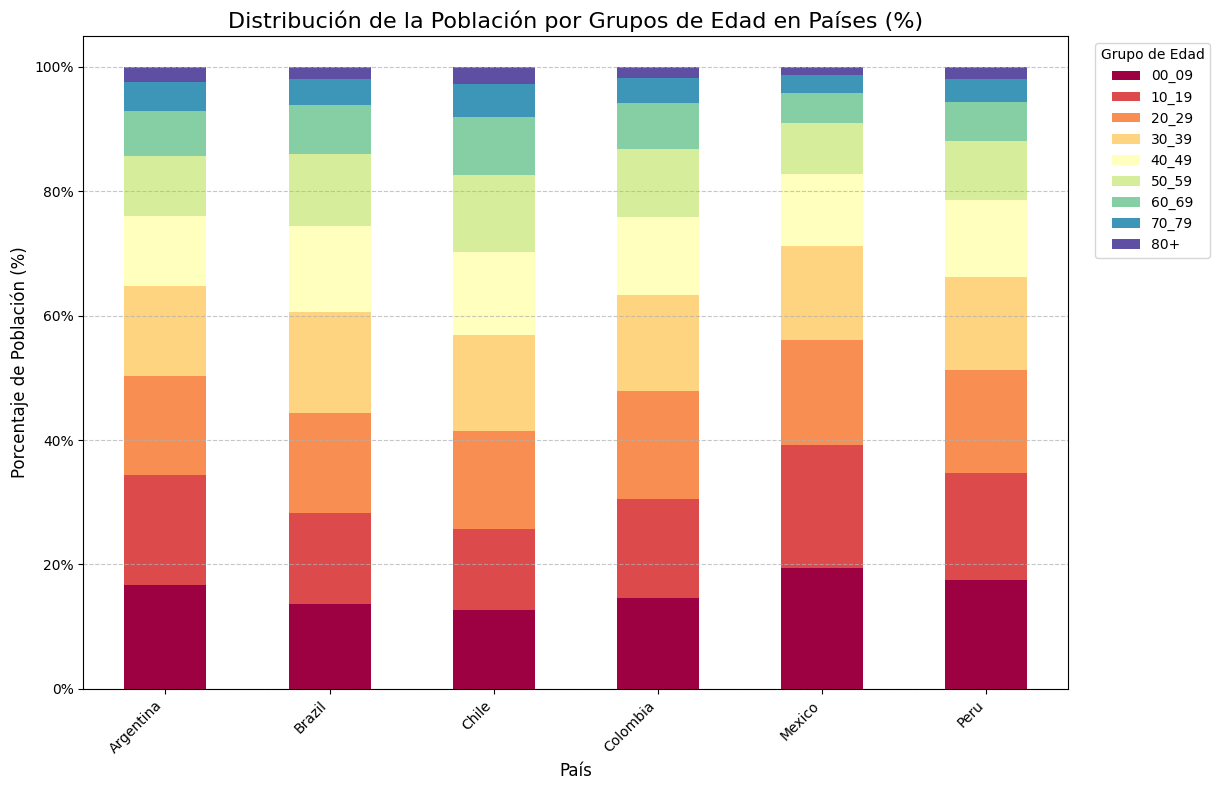

In [ ]:

# Asumiendo que 'datos_regiones' es tu DataFrame.

# 1. Identificar las columnas de los grupos de edad
age_columns = [
    'population_age_00_09', 'population_age_10_19', 'population_age_20_29',
    'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
    'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older'
]

# Columnas necesarias: country_name + las de edad
columns_to_select = ['country_name'] + age_columns

# 2. Obtener los datos demográficos por país (primera entrada, asumiendo que son estáticos)
# y asegurarse de que no haya NaNs en las columnas de edad para estos países
# (si hay, podríamos necesitar imputar o eliminar el país para este gráfico)
population_age_data = datos_regiones[columns_to_select].groupby('country_name').first().reset_index()

# Verificar si hay NaNs en las columnas de edad después de seleccionar los datos por país
if population_age_data[age_columns].isnull().any().any():
    print("Advertencia: Se encontraron NaNs en los datos de grupos de edad. Considera la imputación.")
    # Opción: rellenar NaNs con 0 para el cálculo de proporciones,
    # aunque esto podría distorsionar si hay muchos NaNs.
    population_age_data[age_columns] = population_age_data[age_columns].fillna(0)

print("--- Datos de Población por Edad (muestra) ---")
print(population_age_data.head())
print("\n")

# 3. Calcular las proporciones de cada grupo de edad
# Primero, calcular la población total sumando los grupos de edad para cada país
population_age_data['total_population_from_groups'] = population_age_data[age_columns].sum(axis=1)

# Crear un nuevo DataFrame para las proporciones
population_proportions = population_age_data[['country_name']].copy()
for col in age_columns:
    population_proportions[col] = (population_age_data[col] / population_age_data['total_population_from_groups']) * 100

# Eliminar la columna 'total_population_from_groups' si no se va a usar más en este df
# population_age_data.drop(columns=['total_population_from_groups'], inplace=True)


# Preparar datos para graficar: establecer 'country_name' como índice
population_proportions = population_proportions.set_index('country_name')

# Simplificar nombres de columnas para la leyenda (opcional)
# Quitar 'population_age_' y '_and_older'
simplified_age_labels = {
    col: col.replace('population_age_', '').replace('_and_older', '+') for col in age_columns
}
population_proportions_renamed = population_proportions.rename(columns=simplified_age_labels)


# 4. Crear el gráfico de barras apiladas (100%)
ax = population_proportions_renamed.plot(
    kind='bar',
    stacked=True,
    figsize=(14, 8), # Ajusta el tamaño según necesites
    colormap='Spectral' # Puedes elegir otras paletas: 'viridis', 'Paired', 'tab20', etc.
)

plt.title('Distribución de la Población por Grupos de Edad en Países (%)', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Porcentaje de Población (%)', fontsize=12)
plt.xticks(rotation=45, ha='right') # Rotar etiquetas de países para mejor lectura
plt.legend(title='Grupo de Edad', bbox_to_anchor=(1.02, 1), loc='upper left') # Leyenda fuera del gráfico
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y))) # Formato de porcentaje en eje Y
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 0.88, 1]) # Ajustar layout para dejar espacio a la leyenda
plt.show()



Comparación del progreso de vacunación por país

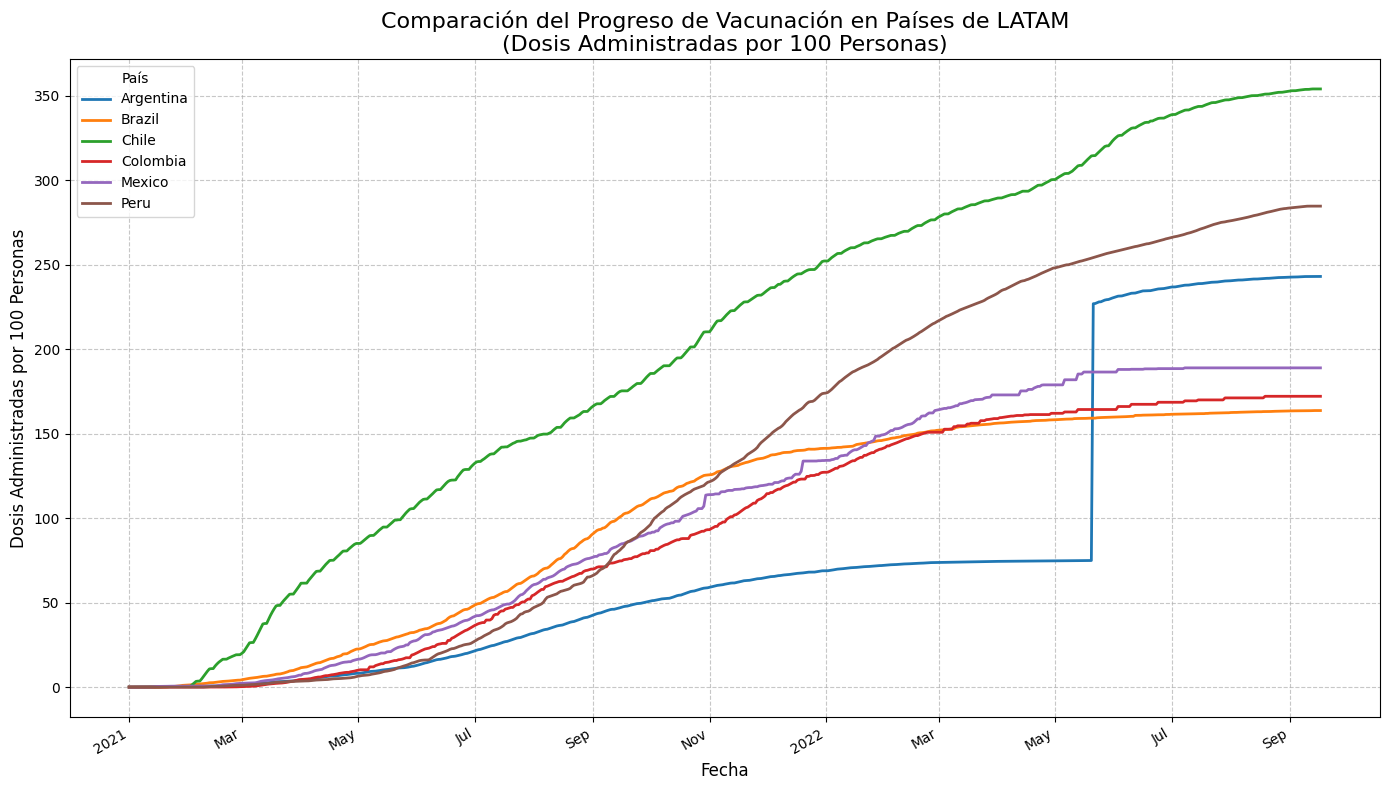

In [ ]:
if 'vaccination_coverage_per_100' not in datos_regiones.columns:
    print("Calculando 'vaccination_coverage_per_100'...")
    datos_regiones['cumulative_vaccine_doses_administered_filled'] = datos_regiones.groupby('country_name')['cumulative_vaccine_doses_administered'].transform(
        lambda x: x.ffill().fillna(0)
    )
    datos_regiones['population_safe'] = datos_regiones['population'].replace(0, pd.NA)
    datos_regiones['vaccination_coverage_per_100'] = \
        (datos_regiones['cumulative_vaccine_doses_administered_filled'] / datos_regiones['population_safe']) * 100
    datos_regiones['vaccination_coverage_per_100'] = datos_regiones['vaccination_coverage_per_100'].fillna(0)
    print("'vaccination_coverage_per_100' calculada.")
# --- Fin del bloque de recálculo ---

# 1. Preparar datos para graficar
# Asegurarse de que los datos estén ordenados por fecha para un correcto trazado de líneas
plot_data_comparison = datos_regiones.sort_values(by=['country_name', 'date'])

# 2. Crear el gráfico de líneas comparativo
plt.figure(figsize=(14, 8))
ax = sns.lineplot(
    data=plot_data_comparison,
    x='date',
    y='vaccination_coverage_per_100',
    hue='country_name', # Una línea de color diferente para cada país
    linewidth=2, # Grosor de la línea
    palette='tab10' # Paleta de colores (puedes probar 'viridis', 'Set2')
)

plt.title('Comparación del Progreso de Vacunación en Países de LATAM\n(Dosis Administradas por 100 Personas)', fontsize=16)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Dosis Administradas por 100 Personas', fontsize=12)
plt.legend(title='País', loc='upper left', frameon=True)
plt.grid(True, linestyle='--', alpha=0.7)

# Formatear el eje X para mostrar fechas de manera legible
ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
plt.xticks(rotation=30, ha='right')

plt.tight_layout()
plt.show()


Evolución de muertes diarias

Recreando 'new_deceased_filled' para asegurar datos correctos para esta gráfica...
--- Datos de Media Móvil de Muertes Diarias (muestra) ---
        date country_name  new_deceased_filled  new_deceased_rolling_avg
0 2021-01-01    Argentina                140.0                140.000000
1 2021-01-02    Argentina                166.0                153.000000
2 2021-01-03    Argentina                157.0                154.333333
3 2021-01-04    Argentina                157.0                155.000000
4 2021-01-05    Argentina                160.0                156.000000
NaNs en 'new_deceased_rolling_avg': 0




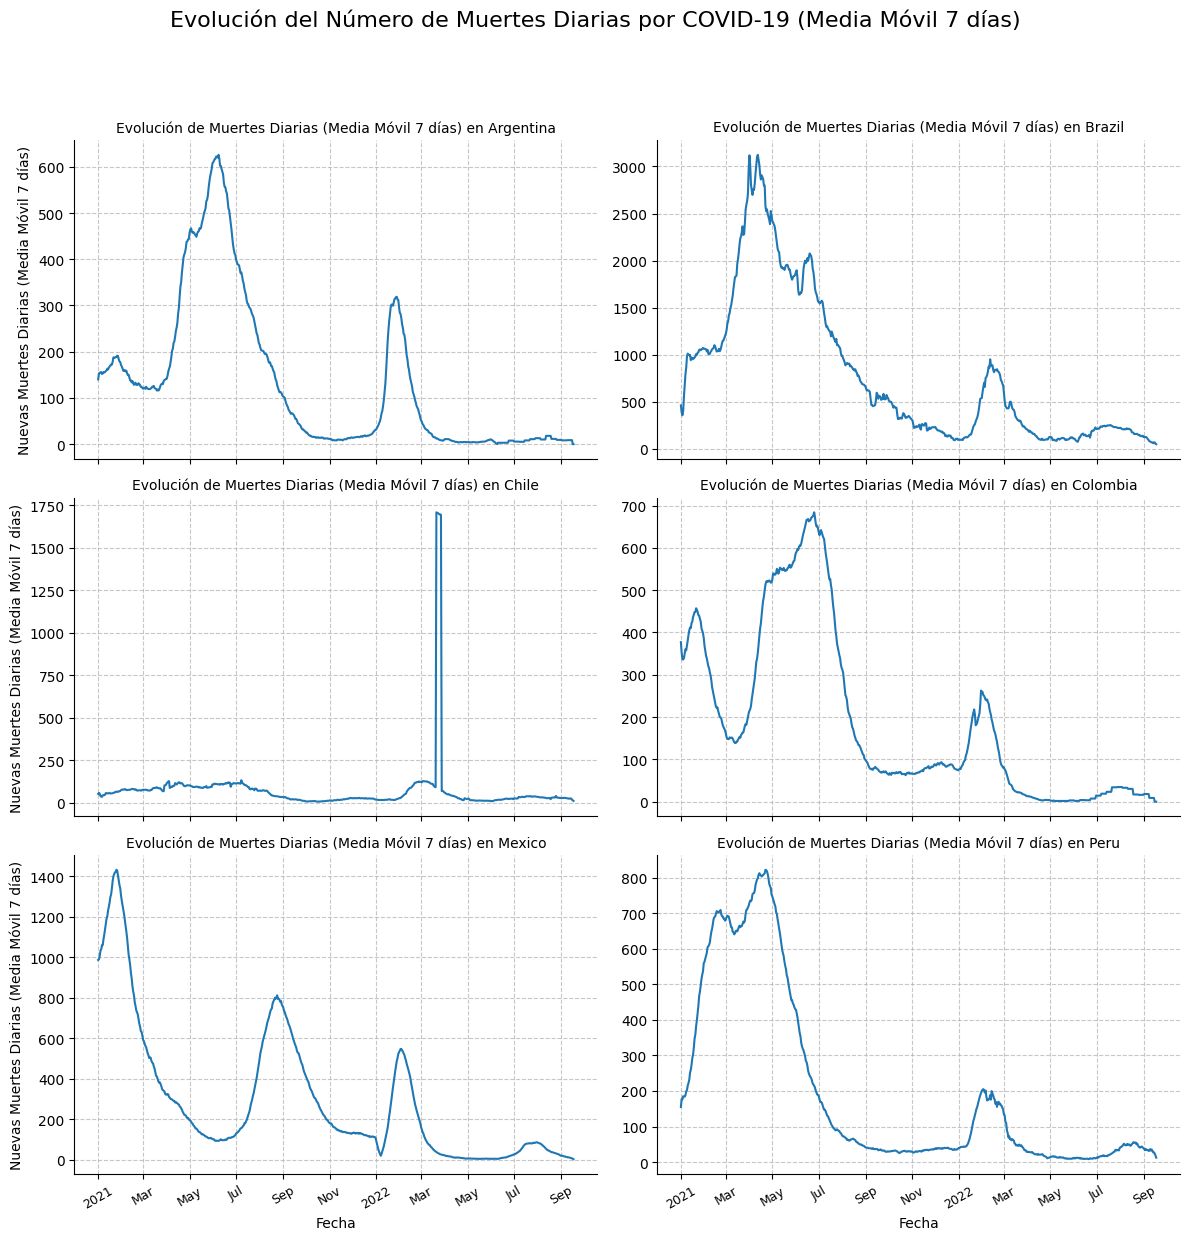

In [ ]:
if 'new_deceased_filled' not in datos_regiones.columns:
    print("Creando 'new_deceased_filled' a partir de 'new_deceased' (NaNs como 0)...")
    datos_regiones['new_deceased_filled'] = datos_regiones['new_deceased'].fillna(0)
else: # Si ya existe
    print("Recreando 'new_deceased_filled' para asegurar datos correctos para esta gráfica...")
    datos_regiones['new_deceased_filled'] = datos_regiones['new_deceased'].fillna(0)


# 2. Calcular la media móvil de 7 días de las nuevas muertes diarias por país
datos_regiones['new_deceased_rolling_avg'] = datos_regiones.groupby('country_name')['new_deceased_filled'].transform(
    lambda x: x.rolling(window=7, min_periods=1).mean() # min_periods=1 para calcular desde el inicio
)

print("--- Datos de Media Móvil de Muertes Diarias (muestra) ---")
print(datos_regiones[['date', 'country_name', 'new_deceased_filled', 'new_deceased_rolling_avg']].head())
# Verificar si hay NaNs después del rolling average (no debería si min_periods=1 y fillna(0) antes)
print(f"NaNs en 'new_deceased_rolling_avg': {datos_regiones['new_deceased_rolling_avg'].isnull().sum()}")
print("\n")

# 3. Preparar datos para graficar
plot_data_deaths = datos_regiones.sort_values(by=['country_name', 'date'])

# 4. Graficar la evolución de la media móvil de muertes diarias por país
g_daily_deaths = sns.relplot(
    data=plot_data_deaths,
    x='date',
    y='new_deceased_rolling_avg',
    kind='line',
    col='country_name',
    col_wrap=2,  # Ajusta según el número de países
    height=4,
    aspect=1.5,
    facet_kws={'sharex': True, 'sharey': False} # Compartir eje X, no el Y
)

g_daily_deaths.set_titles("Evolución de Muertes Diarias (Media Móvil 7 días) en {col_name}")
g_daily_deaths.set_axis_labels("Fecha", "Nuevas Muertes Diarias (Media Móvil 7 días)")

# Ajustar formato de fecha y rotación en cada subgráfica
for ax in g_daily_deaths.axes.flatten():
    if ax is not None:
        ax.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax.xaxis.get_major_locator()))
        ax.tick_params(axis='x', rotation=30, labelsize=9)
        ax.grid(True, linestyle='--', alpha=0.7)

plt.suptitle('Evolución del Número de Muertes Diarias por COVID-19 (Media Móvil 7 días)', fontsize=16, y=1.03)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

Comparación nuevos casos VS muertes diarias

Calculando/Recalculando 'new_confirmed_rolling_avg'...
'new_confirmed_rolling_avg' lista.
Calculando/Recalculando 'new_deceased_rolling_avg'...
'new_deceased_rolling_avg' lista.


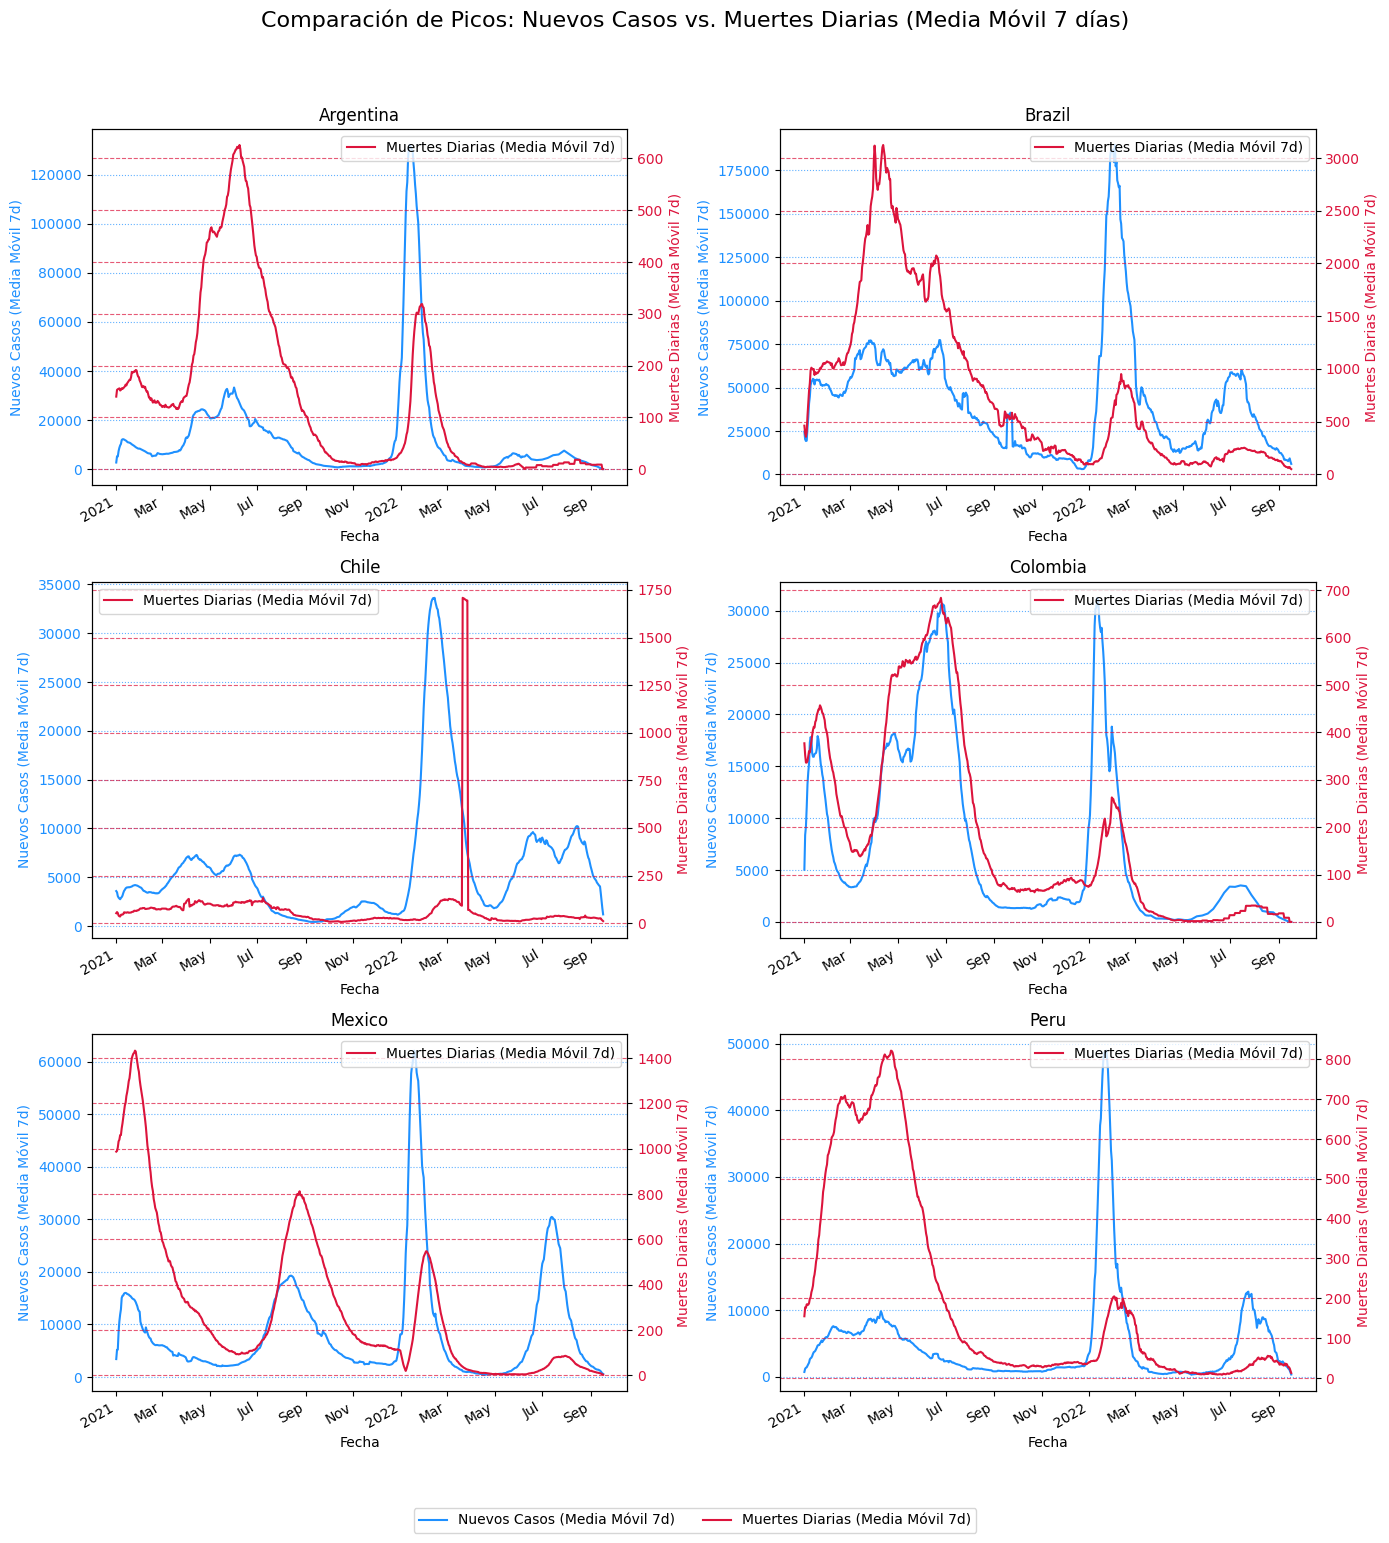

In [ ]:


if 'new_confirmed_rolling_avg' not in datos_regiones.columns or True: # Forzamos el recálculo para asegurar consistencia
    print("Calculando/Recalculando 'new_confirmed_rolling_avg'...")
    datos_regiones['new_confirmed_temp_filled'] = datos_regiones['new_confirmed'].fillna(0)
    # Validar la magnitud de new_confirmed_temp_filled
    # print("Diagnóstico rápido de new_confirmed_temp_filled (max por país):")
    # print(datos_regiones.groupby('country_name')['new_confirmed_temp_filled'].max())
    datos_regiones['new_confirmed_rolling_avg'] = datos_regiones.groupby('country_name')['new_confirmed_temp_filled'].transform(
        lambda x: x.rolling(window=7, min_periods=1).mean()
    )
    datos_regiones.drop(columns=['new_confirmed_temp_filled'], inplace=True, errors='ignore') # Limpiar columna temporal
    print("'new_confirmed_rolling_avg' lista.")

# --- 2. Preparar Media Móvil para Nuevas Muertes Diarias ---
# (Esta se calculó en la gráfica anterior, pero la recalculamos para asegurar que esté disponible)
if 'new_deceased_rolling_avg' not in datos_regiones.columns or True: # Forzamos el recálculo
    print("Calculando/Recalculando 'new_deceased_rolling_avg'...")
    datos_regiones['new_deceased_filled'] = datos_regiones['new_deceased'].fillna(0)
    datos_regiones['new_deceased_rolling_avg'] = datos_regiones.groupby('country_name')['new_deceased_filled'].transform(
        lambda x: x.rolling(window=7, min_periods=1).mean()
    )
    # datos_regiones.drop(columns=['new_deceased_filled'], inplace=True, errors='ignore') 
    print("'new_deceased_rolling_avg' lista.")

# --- 3. Graficar para cada país ---
plot_data_dual_axis = datos_regiones.sort_values(by=['country_name', 'date'])
countries = plot_data_dual_axis['country_name'].unique()
num_countries = len(countries)
col_wrap = min(num_countries, 2) # 2 columnas de subgráficas
num_rows = (num_countries + col_wrap - 1) // col_wrap

fig, axes = plt.subplots(num_rows, col_wrap, figsize=(col_wrap * 7, num_rows * 5), squeeze=False)
axes_flat = axes.flatten()

# Para la leyenda combinada
lines_for_legend = []
labels_for_legend = []

for i, country in enumerate(countries):
    ax1 = axes_flat[i]
    country_data = plot_data_dual_axis[plot_data_dual_axis['country_name'] == country]

    # Eje Y1 para Nuevos Casos (Media Móvil)
    color_cases = 'dodgerblue' # Un color distintivo para casos
    line_cases = sns.lineplot(data=country_data, x='date', y='new_confirmed_rolling_avg', ax=ax1, color=color_cases, label='Nuevos Casos (Media Móvil 7d)')
    ax1.set_ylabel('Nuevos Casos (Media Móvil 7d)', color=color_cases, fontsize=10)
    ax1.tick_params(axis='y', labelcolor=color_cases)
    ax1.set_xlabel('Fecha')
    ax1.set_title(country, fontsize=12)
    ax1.grid(axis='y', linestyle=':', alpha=0.7, color=color_cases) # Rejilla más sutil para el primer eje

    # Eje Y2 para Nuevas Muertes (Media Móvil)
    ax2 = ax1.twinx() # Compartir el mismo eje X
    color_deaths = 'crimson' # Un color distintivo para muertes
    line_deaths = sns.lineplot(data=country_data, x='date', y='new_deceased_rolling_avg', ax=ax2, color=color_deaths, label='Muertes Diarias (Media Móvil 7d)')
    ax2.set_ylabel('Muertes Diarias (Media Móvil 7d)', color=color_deaths, fontsize=10)
    ax2.tick_params(axis='y', labelcolor=color_deaths)
    ax2.grid(axis='y', linestyle='--', alpha=0.7, color=color_deaths) # Rejilla para el segundo eje

    # Formatear fechas en el eje X
    ax1.xaxis.set_major_formatter(mdates.ConciseDateFormatter(ax1.xaxis.get_major_locator()))
    for label_tick in ax1.get_xticklabels(): # Usar label_tick para evitar confusión con 'label' de la leyenda
        label_tick.set_rotation(30)
        label_tick.set_ha('right')

    # Guardar manejadores de línea para leyenda global (solo del primer subplot)
    if i == 0:
        lines_ax1, labels_ax1 = ax1.get_legend_handles_labels()
        lines_ax2, labels_ax2 = ax2.get_legend_handles_labels()
        lines_for_legend.extend(lines_ax1)
        lines_for_legend.extend(lines_ax2)
        labels_for_legend.extend(labels_ax1)
        labels_for_legend.extend(labels_ax2)

    # Remover leyendas individuales de subplots
    ax1.get_legend().remove() if ax1.get_legend() else None
    # ax2 no genera una leyenda por defecto con lineplot si ax1 ya la tiene, pero por si acaso:
    # ax2.get_legend().remove() if ax2.get_legend() else None


# Eliminar ejes no utilizados
for j in range(num_countries, len(axes_flat)):
    fig.delaxes(axes_flat[j])

# Crear una leyenda general para la figura
fig.legend(lines_for_legend, labels_for_legend, loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.02 if num_rows >1 else 0.02))

fig.suptitle('Comparación de Picos: Nuevos Casos vs. Muertes Diarias (Media Móvil 7 días)', fontsize=16, y=1.0)
plt.tight_layout(rect=[0, 0.03 if num_rows >1 else 0.05 , 1, 0.97]) # Ajustar rect para leyenda y título
plt.show()

Análisis de Case Fatality Rate por país

Preparando 'new_confirmed_filled' y 'new_deceased_filled'...
--- CFR Mensual Calculado (muestra) ---
  month_start_date country_name  monthly_cfr_percent
0       2021-01-01    Argentina             1.746295
1       2021-02-01    Argentina             2.164399
2       2021-03-01    Argentina             1.536022
3       2021-04-01    Argentina             1.466759
4       2021-05-01    Argentina             1.920974
NaNs en 'monthly_cfr_percent': 0




C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_22380\2661420860.py:39: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g_monthly_cfr = sns.relplot(


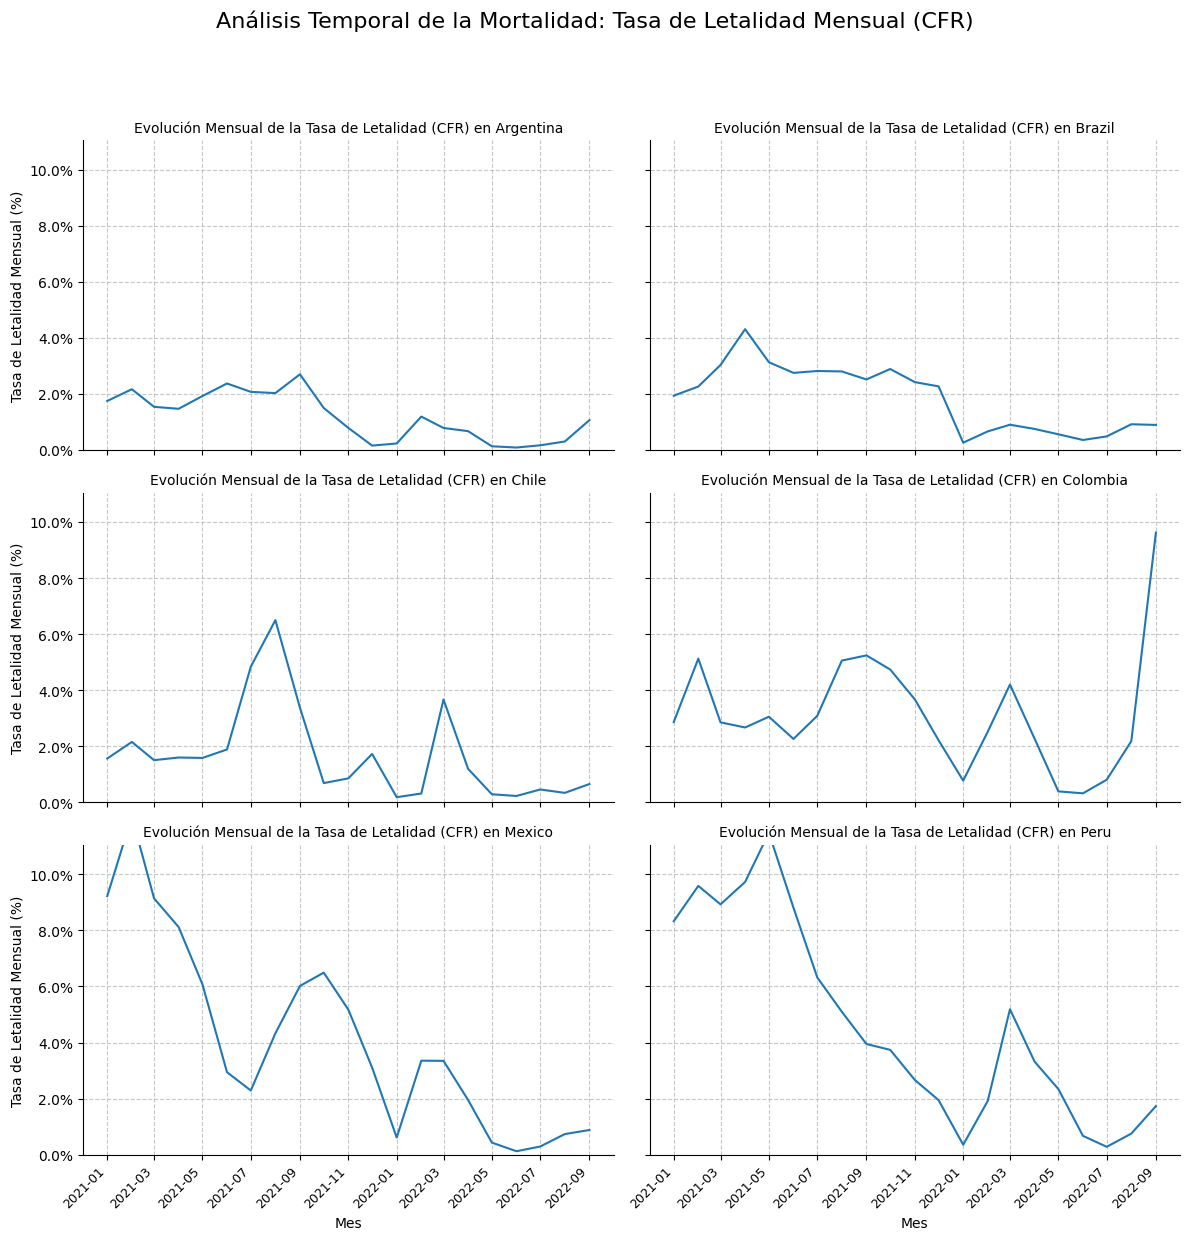

In [ ]:

import matplotlib.dates as mdates

# --- 1. Preparar Columnas de Nuevos Casos y Muertes Diarias ---
print("Preparando 'new_confirmed_filled' y 'new_deceased_filled'...")
datos_regiones['new_confirmed_filled'] = datos_regiones['new_confirmed'].fillna(0)
datos_regiones['new_deceased_filled'] = datos_regiones['new_deceased'].fillna(0)


# --- 2. Agrupar por país y re-muestrear mensualmente ---
df_monthly_cfr_list = []
for country, group in datos_regiones.groupby('country_name'):
    group = group.set_index('date') # 'date' como índice para resample
    monthly_cases = group['new_confirmed_filled'].resample('MS').sum()
    monthly_deaths = group['new_deceased_filled'].resample('MS').sum()
    
    monthly_summary_cfr = pd.DataFrame({
        'monthly_new_cases': monthly_cases,
        'monthly_new_deaths': monthly_deaths
    }).reset_index()
    monthly_summary_cfr['country_name'] = country
    df_monthly_cfr_list.append(monthly_summary_cfr)

df_monthly_cfr_all = pd.concat(df_monthly_cfr_list, ignore_index=True)
df_monthly_cfr_all.rename(columns={'date': 'month_start_date'}, inplace=True)

# --- 3. Calcular CFR Mensual ---
df_monthly_cfr_all['monthly_cfr_percent'] = \
    (df_monthly_cfr_all['monthly_new_deaths'] / df_monthly_cfr_all['monthly_new_cases']) * 100
df_monthly_cfr_all['monthly_cfr_percent'] = df_monthly_cfr_all['monthly_cfr_percent'].replace([np.inf, -np.inf], np.nan)

print("--- CFR Mensual Calculado (muestra) ---")
print(df_monthly_cfr_all[['month_start_date', 'country_name', 'monthly_cfr_percent']].head())
print(f"NaNs en 'monthly_cfr_percent': {df_monthly_cfr_all['monthly_cfr_percent'].isnull().sum()}")
print("\n")

# --- 4. Graficar la evolución del CFR mensual por país ---
g_monthly_cfr = sns.relplot(
    data=df_monthly_cfr_all,
    x='month_start_date',
    y='monthly_cfr_percent',
    kind='line',
    col='country_name',
    col_wrap=2,
    height=4,
    aspect=1.5,
    palette='coolwarm_r',
    facet_kws={'sharex': True, 'sharey': True}
)

g_monthly_cfr.set_titles("Evolución Mensual de la Tasa de Letalidad (CFR) en {col_name}")
g_monthly_cfr.set_axis_labels("Mes", "Tasa de Letalidad Mensual (%)")
# Ajustar límite Y para mejor visualización, excluyendo outliers extremos si los hay
# Usamos dropna() para que quantile no falle si hay muchos NaNs al principio
valid_cfr_for_ylim = df_monthly_cfr_all['monthly_cfr_percent'].dropna()
if not valid_cfr_for_ylim.empty:
    ylim_top = valid_cfr_for_ylim.quantile(0.99) if valid_cfr_for_ylim.quantile(0.99) > 0 else valid_cfr_for_ylim.max()
    if pd.notna(ylim_top) and ylim_top > 0 : # Solo ajustar si el cuantil es válido y positivo
         g_monthly_cfr.set(ylim=(0, max(5, ylim_top))) # Asegurar un ylim mínimo de 5% o el cuantil si es mayor


# Ajustar formato de fecha y rotación en cada subgráfica
for ax in g_monthly_cfr.axes.flatten():
    if ax is not None: 
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
        # Corrección para rotación y alineación de etiquetas del eje X:
        plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=9)
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.1f}%'.format(y)))

plt.suptitle('Análisis Temporal de la Mortalidad: Tasa de Letalidad Mensual (CFR)', fontsize=16, y=1.03)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.show()

In [ ]:

import folium
from folium.plugins import MarkerCluster # Opcional
import numpy as np # Para np.sqrt si no está importado
# from IPython.display import display # Necesario en algunos entornos para forzar la visualización

# --- 1. Preparar Datos para el Mapa ---
print("Preparando datos para el mapa...")

# a) Obtener latitud, longitud y población (tomando la primera entrada por país)
country_geo_data = datos_regiones.groupby('country_name').first()[[
    'latitude', 'longitude', 'population'
]].reset_index()

# b) Calcular el máximo de casos confirmados acumulados por 100k habitantes
max_confirmed_data = datos_regiones.loc[
    datos_regiones.groupby('country_name')['cumulative_confirmed'].idxmax()
].copy()

max_confirmed_data['population_safe'] = max_confirmed_data['population'].replace(0, pd.NA)
max_confirmed_data['max_cases_per_100k'] = \
    (max_confirmed_data['cumulative_confirmed'] / max_confirmed_data['population_safe']) * 100000
max_confirmed_data['max_cases_per_100k'] = max_confirmed_data['max_cases_per_100k'].fillna(0)

# Unir con los datos geográficos
map_data = pd.merge(country_geo_data,
                    max_confirmed_data[['country_name', 'max_cases_per_100k', 'cumulative_confirmed']],
                    on='country_name',
                    how='left')

print("--- Datos para el Mapa (muestra) ---")
print(map_data.head()) # Mostrar solo head para no saturar la salida
print("\n")

# Eliminar filas donde falten coordenadas o la métrica principal para el radio
map_data_cleaned = map_data.dropna(subset=['latitude', 'longitude', 'max_cases_per_100k'])

if map_data_cleaned.empty:
    print("No hay datos suficientes para generar el mapa después de limpiar NaNs.")
else:
    # --- 2. Crear el Mapa con Folium ---
    print("Creando el mapa con Folium...")
    center_lat = -15 
    center_lon = -55 
    
    m = folium.Map(location=[center_lat, center_lon], zoom_start=3, tiles='CartoDB positron')

    for index, row in map_data_cleaned.iterrows():
        radius_scaled = np.sqrt(row['max_cases_per_100k']) * 0.3 
        radius_scaled = max(5, min(radius_scaled, 30))

        popup_html = f"""
        <b>País:</b> {row['country_name']}<br>
        <b>Máx. Casos Acum. por 100k:</b> {row['max_cases_per_100k']:,.0f}<br>
        <b>Total Máx. Casos Acum.:</b> {row['cumulative_confirmed']:,.0f}
        """
        iframe = folium.IFrame(html=popup_html, width=250, height=100)
        popup = folium.Popup(iframe, max_width=2650)

        folium.CircleMarker(
            location=[row['latitude'], row['longitude']],
            radius=radius_scaled,
            popup=popup,
            tooltip=f"{row['country_name']}: {row['max_cases_per_100k']:,.0f} casos/100k",
            color='crimson',
            fill=True,
            fill_color='crimson',
            fill_opacity=0.6
        ).add_to(m)

    print(f"\nMapa generado. Se mostrará a continuación en la salida del notebook.")
    
    # Opción 2: Usar display(m) (importar from IPython.display import display)
    from IPython.display import display
    display(m)

Preparando datos para el mapa...
--- Datos para el Mapa (muestra) ---
  country_name  latitude  longitude  population  max_cases_per_100k  \
0    Argentina     -34.0     -64.00    44938712        21579.975412   
1       Brazil     -14.0     -53.00   212559409        16263.139403   
2        Chile     -33.0     -71.00    17574003        25995.756345   
3     Colombia       4.0     -73.25    50882884        12389.857855   
4       Mexico      23.0    -102.00   110991953         3656.930877   

   cumulative_confirmed  
0             9697763.0  
1            34568833.0  
2             4568495.0  
3             6304317.0  
4             4058899.0  


Creando el mapa con Folium...

Mapa generado. Se mostrará a continuación en la salida del notebook.


In [41]:
datos_regiones.describe()

,date,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_rural,...,new_confirmed_filled,new_confirmed_rolling_avg,growth_rate_new_confirmed,cumulative_vaccine_doses_administered_filled,population_safe,vaccination_coverage_per_100,average_temperature_celsius_filled,year,new_deceased_filled,new_deceased_rolling_avg
count,3750,3720.000000,3729.000000,3.729000e+03,3729.000000,3.161000e+03,3.750000e+03,3.750000e+03,3.750000e+03,3.750000e+03,...,3750.000000,3750.000000,3744.000000,3.750000e+03,3.750000e+03,3750.000000,3750.000000,3750.000000,3750.000000,3750.000000
mean,2021-11-08 23:59:59.999999744,13958.320699,277.300885,6.777284e+06,192974.495307,7.751506e+07,7.772147e+07,3.787035e+07,3.927162e+07,1.255498e+07,...,13846.654133,13879.434495,0.183210,8.069867e+07,7.772147e+07,117.875798,21.023543,2021.416000,275.748000,277.439797
min,2021-01-01 00:00:00,-573.000000,0.000000,9.710000e+02,1.000000,1.800000e+01,1.757400e+07,8.972014e+06,8.601989e+06,2.341903e+06,...,-573.000000,0.000000,-90.066848,0.000000e+00,1.757400e+07,0.000000,3.432099,2021.000000,0.000000,0.000000
25%,2021-06-06 00:00:00,1813.750000,26.000000,2.125355e+06,59146.000000,1.562498e+07,2.938188e+07,1.445076e+07,1.493113e+07,3.599141e+06,...,1728.000000,2043.071429,0.047916,1.599228e+07,2.938188e+07,31.000411,17.271605,2021.000000,25.000000,28.142857
50%,2021-11-09 00:00:00,5223.000000,100.000000,3.629796e+06,139621.000000,4.223210e+07,4.791080e+07,2.225416e+07,2.324582e+07,8.316128e+06,...,5129.000000,5730.071429,0.141578,4.771301e+07,4.791080e+07,113.950324,21.590741,2021.000000,98.000000,103.285714
75%,2022-04-14 00:00:00,14665.250000,314.000000,6.223497e+06,215028.000000,8.267872e+07,1.109920e+08,5.485523e+07,5.748131e+07,2.494867e+07,...,14489.750000,15542.071429,0.429751,9.408868e+07,1.109920e+08,172.094296,25.777778,2022.000000,311.750000,320.500000
max,2022-09-17 00:00:00,298408.000000,11447.000000,3.456883e+07,685203.000000,3.478685e+08,2.125594e+08,1.044358e+08,1.081236e+08,2.780789e+07,...,298408.000000,189526.000000,43.291554,3.478685e+08,2.125594e+08,353.955983,39.138889,2022.000000,11447.000000,3123.571429
std,NaN,24190.788330,508.206954,7.995728e+06,182936.954037,9.588437e+07,6.713774e+07,3.318493e+07,3.448406e+07,1.008074e+07,...,24125.879426,22228.367478,2.746888,9.352972e+07,6.713774e+07,93.884884,6.068207,0.492959,507.204008,450.797562
